## MTH 9875 The Volatility Surface:    Fall 2016

<p>

### Lecture 1: Stylized facts


Jim Gatheral   
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "right" width=500></h3>
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   
   


### Outline of lecture 1

* Power laws
 * Zipf's law
 * Empirical observations
 
 
- Introduction to R and iPython notebook

 
* Financial time series: stylized facts


* The volatility surface
    - Term structure of at-the-money skew
    - The skew-stickiness ratio
    - The volatility envelope

### Power laws

Consider the distribution of papers with "QCD" in the title.  As of August, 2006, there
were 16,597 of them in total.  These were distributed as follows:

Number of citations  | Number of papers
------: | -------------:
1,000+ | 8
500+ | 43
100+ | 686
50+  | 1,561
0+ | 16,951


Just eye-balling the data, you can see that if you double the
cutoff, you divide the number of papers by approximately 4 (for
large cutoffs).

Repeating this experiment for papers with "exponentiation" in the
title, I got

Number of citations  | Number of papers
-------------: | -------------:
1,000+ | 0
500+ | 0
100+ | 3
50+  | 11
0+ | 86


This kind of power-law distribution occurs all the time in social
sciences.  Pareto for example noted that $80\%$ of wealth was owned
by $20\%$ of the population, $64\%$ of wealth was owned by $4\%$ of
the population, and so on.



### Zipf's Law

"The frequency of any word is inversely proportional to its rank in the frequency table."

$$
\Pr(S>x) \sim \frac{1}{x^\zeta} \quad \text{ with } \zeta \approx 1
$$

This empirical law applies to the sizes of cities and many other economic variables.  Here are some others:  

* Amazon book rank
* Firm sizes
* Income and wealth
* CEO compensation. 



### Aggregation properties

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\angl}[1]{\langle{#1}\rangle}
$$
If $X_i$ are independent power-law distributed random variables,


$$
\bea
\zeta_{X_1+ \dots + X_n}&=&\min(\zeta_{X_1},\dots,\zeta_{X_n})\\
\zeta_{X_1\times \dots \times X_n}&=&\min(\zeta_{X_1},\dots,\zeta_{X_n})\\
\zeta_{\max(X_1,\dots ,X_n)}&=&\min(\zeta_{X_1},\dots,\zeta_{X_n})\\
\zeta_{\min(X_1,\dots ,X_n)}&=&\zeta_{X_1}+\dots+\zeta_{X_n}\\
\zeta_{\alpha\,X}&=&\zeta_{X}\\
\zeta_{X^\alpha}&=&\frac{\zeta_{X}}{\alpha}\\
\eea
$$

### Examples of power-law distributions

From Wikipedia:

* Pareto distribution (continuous).
 * Number of people with income $>w \sim w^{-\alpha}$ with $\alpha \in (1.5,2)$.
* Zeta distribution (discrete).
* Yule-Simon distribution (discrete).
 * Originally a model for the distribution of biological taxa and subtaxa.
* Student's t-distribution (continuous), of which the Cauchy distribution is a special case.
* Zipf's law and its generalization, the Zipf-Mandelbrot law (discrete).
 * Word frequency is inversely proportional to rank.
* Lotka's law
 * The number of authors with $n$ publications $\sim 1/n^2$.


### Examples of power-laws

* The scale-free network model
* Gutenberg-Richter law of earthquake magnitudes
* Horton's laws describing river systems
* Richardson's Law for the severity of violent conflicts (wars and terrorism)
* Population of cities
* Numbers of religious adherents
* Net worth of individuals
* Frequency of words in a text
* 90-9-1 principle on wikis

### An example for fun: Amazon page ranks

Assuming Zipf's law:

Author | Title | Rank | Est. monthly sales
:------------- | :-------------|-------------: | -------------:
Marie Kondo  |The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing| 2 | <font color="blue">4,849,605
Nassim Taleb|The Black Swan | 4,741|<font color="blue">2,046 
Nassim Taleb|The Bed of Procrustes | 77,782|<font color="blue">125
Dan Stefanica | A Primer for the Mathematics of Financial Engineering | 252,773 |<font color="blue">38
Jim Gatheral | The Volatility Surface| 323,307 |<font color="red">30
Peter Friz and Nicolas Victoir | Multidimensional stochastic processes etc. etc. | 1,534,786| <font color="blue">4
Tianpei Mo | Anatomy and Systematics of Bagridae Teleostei etc. | 14,907,859| <font color="blue">1




### The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing

http://www.amazon.com/The-Life-Changing-Magic-Tidying-Decluttering/dp/1607747308/ref=zg_bs_books_2

In [1]:
# Code to generate table
ranks <- c(2,4741,77782,252773,323307,1534786,14907859)
sales <- (323307/ranks)*30
print(round(sales,0))

[1] 4849605    2046     125      38      30       6       1


### Repeat with a different exponent

Assuming a power-law with an exponent of 0.8:

Author | Title | Rank | Est. monthly sales
:------------- | :-------------|-------------: | -------------:
Marie Kondo  |The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing| 2 | <font color="blue">440,544
Nassim Taleb|The Black Swan | 4,741|<font color="blue">879
Nassim Taleb|The Bed of Procrustes | 77,782|<font color="blue">94
Dan Stefanica | A Primer for the Mathematics of Financial Engineering | 252,773 |<font color="blue">37
Jim Gatheral | The Volatility Surface| 323,307 |<font color="red">30
Peter Friz and Nicolas Victoir | Multidimensional stochastic processes etc. etc. | 1,534,786| <font color="blue">9
Tianpei Mo | Anatomy and Systematics of Bagridae Teleostei etc. | 14,907,859| <font color="blue">1

In [2]:
# Code to generate table
ranks <- c(2,4741,77782,252773,323307,1534786,14907859)
sales <- (323307/ranks)^0.8*30
print(round(sales,0))

[1] 440544    879     94     37     30      9      1


### A digression: the Fokker-Planck equation

The Fokker-Planck equation describes the evolution of the probability density in a diffusion process. Specifically, suppose

$$
dX_t=\mu(X_t,t)\,dt+\sigma(X_t,t)\,dW
$$

Then, applying It&ocirc;'s Lemma,
$$
df = \frac{\partial f}{\partial t}\,dt+\mu(X_t,t)\,\frac{\partial f}{\partial X_t}\,dt+
\frac{\sigma(X_t,t)^2}{2}\,\frac{\partial^2 f}{\partial X_t^2}\,dt+\\\sigma(X_t,t)\,\frac{\partial f}{\partial X_t}\,dW
$$

We now choose a special $f(.)$.  Let $f(X,T)=\delta(X-x)$ (independent of $T$).  Then

$$
\E\left[f(X_T,T)\right]=\int_{-\infty}^{+\infty}\,dz\,p(z,T)\,\delta(z-x)=p(x,T)
$$

Taking expectations of It&ocirc;'s Lemma, noting that $\partial_T f(X,T)=0$, we obtain

\begin{eqnarray*}
&&\frac{d\E\left[f(X_t,t)\right]}{dt}\\&=&\E\left[\mu(z,t)\,\frac{\partial f(z,t)}{\partial z}+\frac{\sigma^2(z,t)}{2}\,\frac{\partial^2 f(z,t)}{\partial z^2}\right]\\
&=&\int_{-\infty}^{+\infty}\,dz\,p(z,t)\,\left\{\mu(z,t)\,\frac{\partial f(z,t)}{\partial z}+\frac{\sigma^2(z,t)}{2}\,\frac{\partial^2 f(z,t)}{\partial z^2}\right\}\\
&=&\int_{-\infty}^{+\infty}\,dz\,f(z,t)\,\left\{-\frac{\partial}{\partial z}\left(\mu(z,t)\,p(z,t)\right)+\frac{1}{2}\,\frac{\partial^2}{\partial z^2}\,\left(\sigma^2(z,t)\,p(z,t)\right)
\right\}\\
\end{eqnarray*}

Substituting $f(z,t)=\delta(z-x)$ gives

#### The forward Kolmogorov or Fokker-Planck equation


$$
\frac{d p(x,t)}{dt}=-\frac{\partial}{\partial x}\left(\mu(x,t)\,p(x,t)\right)+\frac{1}{2}\,\frac{\partial^2}{\partial x^2}\,\left(\sigma^2(x,t)\,p(x,t)\right)
$$

### Robust heuristic derivation of Zipf's Law

Following Gabaix<sup id="cite_ref-Black_Swan_8-0" class="reference"><a href="#cite_note-Black_Swan-8"><span>[</span>6<span>]</span></a></sup>, assume

<a name="eq:GabaixProcess"></a>(1)$$
dX=\mu\,X\,dt+\nu\,X\,dZ
$$
where $X$ is size.  


Let $f(x,t)$ be the density (of sizes for example).  In steady state, $\partial_t f(\cdot)=0$ so put $f(x,t)=f(x)$ and the forward Kolmogorov (Fokker-Planck) equation then reads:

$$
-\partial_x\left(\mu\, x\,f(x)\right)+\partial_{x,x}\left(\frac{\nu^2}{2}\,x^2\,f(x)\right)=0
$$

Try
$$
f(x)=\frac{C}{x^{\zeta+1}}
$$
Then
$$
\frac{C}{x^{\zeta+1}}\,\left\{\mu\,\zeta+\frac{\nu^2}{2}(\zeta-1)\,\zeta\right\}=0
$$

Then either $\zeta = 0$ or
$$
\zeta=1-\frac{2\,\mu}{\nu^2}.
$$
The choice $\zeta=0$ gives a logarithmic function that diverges at $x \to 0$ and as $x \to \infty$.  

The choice
$\zeta=1-\frac{2\,\mu}{\nu^2}
$ gives a density that diverges as $x \to 0$, so cut off at $S_{min}$.

$$
\int f(x)\,dx=\int_{S_{min}}^\infty\,\frac{C}{x^{\zeta+1}}\,dx=\frac{C}{\zeta\,S_{min}^\zeta}=1 
$$
Then we obtain the power law

$$
f(x)=\zeta\,S_{min}^\zeta\,\frac{1}{x^{\zeta+1}};\,F(x)=\left(\frac{S_{min}}{x}\right)^\zeta.
$$

Now, to estimate $\zeta$, compute the average size

$$
\bar S=\int x\,f(x)\,dx=\frac{\zeta}{\zeta-1}\,S_{min}.
$$

Then

$$
\zeta=\frac{1}{1-\frac{S_{min}}{\bar S}}
$$

which gives us our result if $S_{min} \ll \bar S$.

### The Gabaix result in words

<font color="red">If the average size of something is much bigger than the minimum size, and assuming the growth process  [(1)](#eq:GabaixProcess), the distribution of sizes is power-law with tail exponent approximately $1$.

### Power laws from entropy maximization

Define the set of observables $n$ to be the positive integers so that $n \in \left\{1,2,3,...\right\}$.  The Shannon entropy (a measure of average information) is given by

$$
\mathcal{S} = - \sum_n\,p_n\,\log p_n
$$

where the probability that $n$ is observed is $p_n$.

Suppose that we know that the mean of $\log n$ exists (definitely so in any finite system).  Denote $\langle \log n \rangle = \sum_n\,p_n\,\log n= \chi$.  Of course we also have the further contraint $\sum_n p_n =1$.



We now maximimize the Shannon entropy subject to these constraints using Lagrange multipliers.   We want to maximize

$$
\mathcal{L} = - \sum_n\,p_n\,\log p_n - \lambda\,\left(\sum_n p_n - 1\right) - z\,\left(\sum_n p_n\,\log n -\chi\right)
$$

with respect to the $p_n$.

Differentiating with respect to $p_n$ gives

$$
- \log p_n -1 -\lambda - z\,\log n = 0.
$$

or equivalently,

$$
p_n = \frac{e^{-1-\lambda}}{n^{z}}.
$$

The Riemann zeta function is defined as

$$
\zeta(z) = \sum_n \frac{1}{n^z}
$$

so applying the normalization constraint gives the explicit solution

$$
p_n = \frac{1}{\zeta(z)}\,\frac{1}{n^z}.
$$

- We see immediately that maximizing entropy subject only to the constraint that the mean of the log exists, gives rise to a power-law distribution.

The value of the exponent $z$ in the power law may be obtained in terms of $\chi$ as follows.

$$
\chi(z) = \langle \log n \rangle =  \frac{1}{\zeta(z)}\,\sum_n\,\frac{\log n}{n^z} 
= - \frac{1}{\zeta(z)}\,\frac{d\zeta(z)}{dz} = - \frac{d }{dz} \log \zeta(z).
$$

- Note in particular that $\zeta(z)$ converges only if $z>1$ so we cannot obtain Zipf's law exactly using entropy maximization.
    - Recall that the argument of Gabaix also gives $z>1$.
- Notice also that if $\langle \log n \rangle$ is a reasonably large number, $z$ is close to $1$.
    - https://www.wolframalpha.com/input/?i=Plot%5B-ReimannZeta%27%5Bz%5D,%7Bz,1.1,1.3%7D%5D

## Financial time series: stylized facts

From Cont (2001)<sup id="cite_ref-Cont2001" class="reference"><a href="#cite_note-Cont2001"><span>[</span>5<span>]</span></a></sup>:

>the seemingly 
random variations of asset prices do share some quite non-trivial statistical properties. Such properties, common across 
a wide range of instruments, markets and time periods are 
called *stylized empirical facts*.



Cont (2001)<sup id="cite_ref-Cont2001" class="reference"><a href="#cite_note-Cont2001"><span>[</span>4<span>]</span></a></sup> lists the following stylized facts

-  **Absence of autocorrelation**: (linear) autocorrelations 
of asset returns are often insigniﬁcant, except for very 
small intraday time scales.


- **Heavy tails**: the (unconditional) distribution of returns 
seems to display a power-law or Pareto-like tail, with 
a tail index which is finite, higher than two and less 
than five for most data sets studied. In particular this 
excludes stable laws with infinite variance and the normal 
distribution.

- **Gain/loss asymmetry**: one observes large drawdowns in 
stock prices and stock index values but not equally large 
upward movements. 


- **Aggregational Gaussianity**: as one increases the 
time scale $\Delta t$ over which returns are calculated, 
their distribution looks more and more like a normal 
distribution. In particular, the shape of the distribution 
is not the same at different time scales. 

- **Intermittency**: returns display, at any time scale, a high 
degree of variability. This is quantiﬁed by the presence of 
irregular bursts in time series of a wide variety of volatility 
estimators. 


- **Volatility clustering**:
different measures of volatility 
display a positive autocorrelation over several days, which 
quantiﬁes the fact that high-volatility events tend to cluster 
in time. 

- **Conditional heavy tails**: 
even after correcting returns for 
volatility clustering (e.g. via GARCH-type models), the 
residual time series still exhibit heavy tails. However, the 
tails are less heavy than in the unconditional distribution 
of returns. 


- **Slow decay of autocorrelation in absolute returns**:
 the 
autocorrelation function of absolute returns decays slowly 
as a function of the time lag, roughly as a power law with 
an exponent $\beta \in [0.2, 0.4]$. This is sometimes interpreted 
as a sign of long-range dependence. 

- **Leverage effect**: 
most measures of volatility of an asset are negatively correlated with the returns of that asset.


- **Volatility/volume correlation**:trading volume is 
correlated with all measures of volatility. 


- **Asymmetry in time scales**:
coarse-grained measures of 
volatility predict fine-scale volatility better than the other 
way round. 

To quote Rama Cont again, 

>these stylized facts are so constraining that
it is not easy to exhibit even an *ad hoc* stochastic process
which possesses the same set of properties and one has to go to
great lengths to reproduce them with a model.

### Power laws in daily SPX returns

Using R and the quantmod package, we analyze log-returns of SPX since 1950.

In [3]:
library(quantmod)
library(boot)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [4]:
#Get SPX and VIX data from Yahoo!
options("getSymbols.warning4.0"=FALSE)

getSymbols("^GSPC",from="1927-01-01") #Creates the time series object GSPC

[1] "GSPC"

Do the same for VIX and create joint dataset of VIX and SPX

In [5]:
getSymbols("^VIX",from="1927-01-01") #Creates the time series object VIX

mm <- specifyModel(Cl(GSPC)~Cl(VIX))
spxVixData <-modelData(mm) #quantmod function automatically aligns data from two series

vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]

print(head(spxVixData))
print(tail(spxVixData))

[1] "VIX"

           Cl.GSPC Cl.VIX
1990-01-02  359.69  17.24
1990-01-03  358.76  18.19
1990-01-04  355.67  19.22
1990-01-05  352.20  20.11
1990-01-08  353.79  20.26
1990-01-09  349.62  22.20
           Cl.GSPC Cl.VIX
2016-08-17 2182.22  12.19
2016-08-18 2187.02  11.43
2016-08-19 2183.87  11.34
2016-08-22 2182.64  12.27
2016-08-23 2186.90  12.38
2016-08-24 2175.44  13.45


### Histogram of SPX daily log-returns

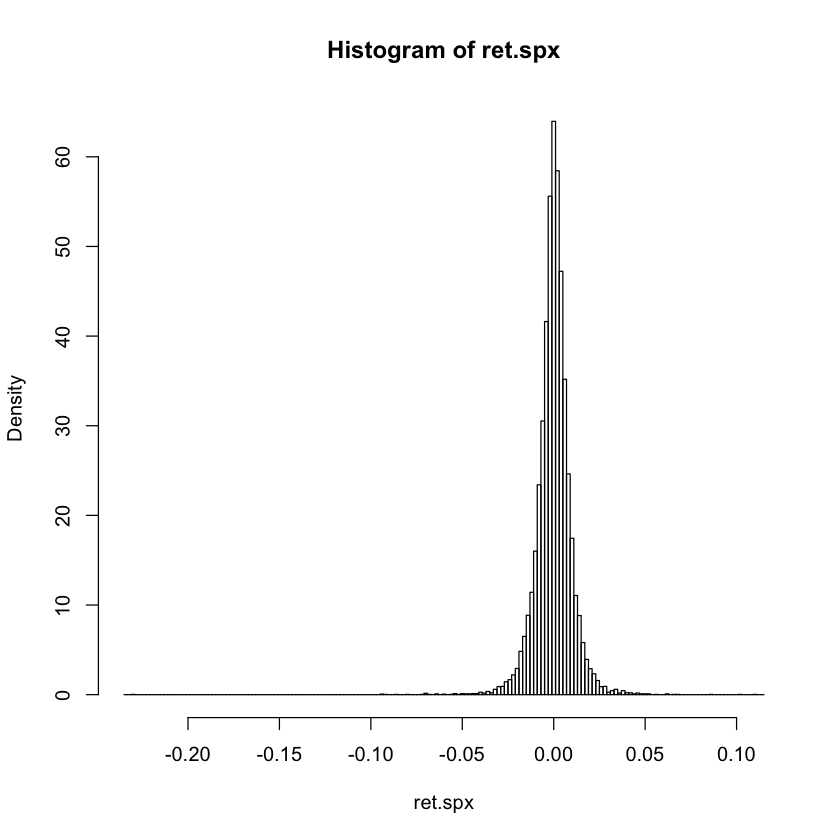

In [6]:
ret.spx <- log(Cl(GSPC)/lag(Cl(GSPC)))
ret.spx <- ret.spx[!is.na(ret.spx)]  # Remove missing values
ret.spx <- ret.spx-mean(ret.spx)
breaks <- seq(-.235,.115,.002)
hist.spx <- hist(ret.spx,breaks=breaks,freq=F)


Figure 1: Histogram of SPX daily log-returns. Note the outlier in the left tail!

### The cubic law of returns

[1] "breaks"   "counts"   "density"  "mids"     "xname"    "equidist"


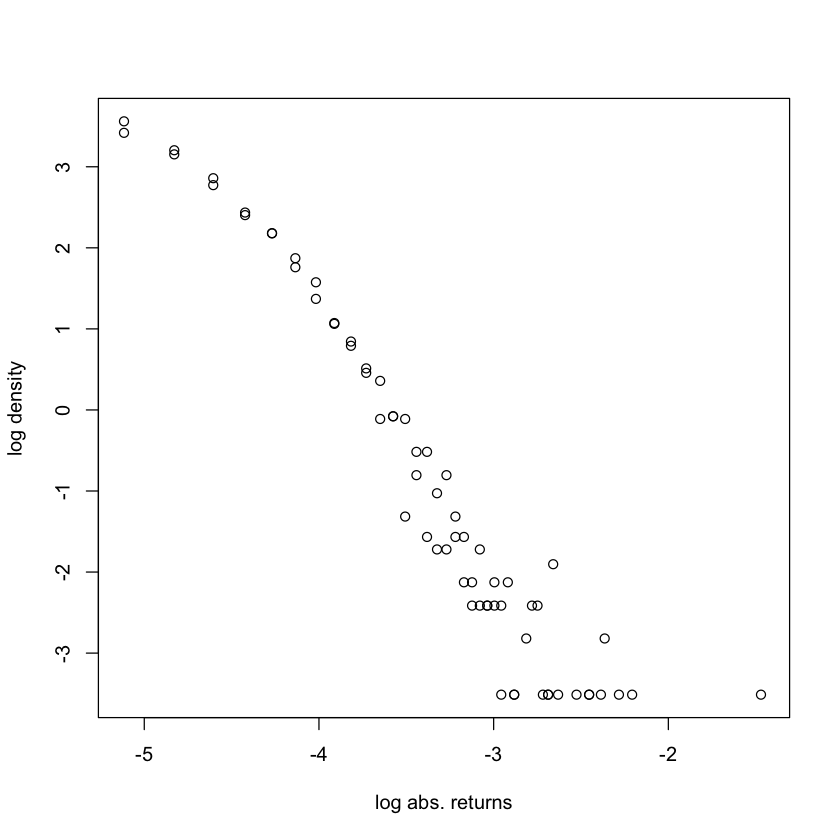

In [7]:
print(names(hist.spx))
spx.density <- hist.spx$density 
mids <- hist.spx$mids 
x <- abs(mids)[abs(mids)>0.005] 
y <- spx.density[abs(mids)>0.005] 

# Log-log plot
plot(log(x),log(y),ylab="log density",xlab="log abs. returns")

In [8]:
# Look only at tails
cutoff <- 0.02 
rh <- (mids > cutoff) 
lh <- (mids < (-cutoff)) 

xrh <- mids[rh] 
xlh <- -mids[lh] 
yrh <- spx.density[rh]
ylh <- spx.density[lh] 

lnx.rh <- log(xrh)[yrh>0] 
lny.rh <- log(yrh)[yrh>0] 
lnx.lh <- log(xlh)[ylh>0] 
lny.lh <- log(ylh)[ylh>0] 

rh.lm <- lm(lny.rh~lnx.rh) 
lh.lm <-lm(lny.lh~lnx.lh) 

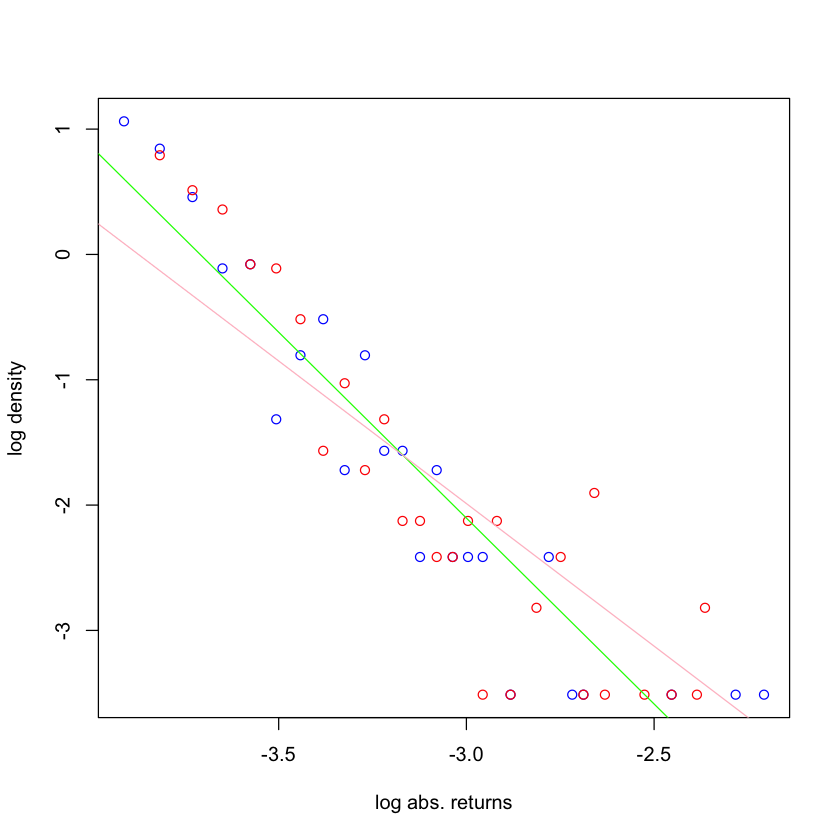

In [9]:
plot(lnx.rh,lny.rh,ylab="log density",col="blue",xlab="log abs. returns")
points(lnx.lh,lny.lh,col="red") 
abline(rh.lm,col="green") 
abline(lh.lm,col="pink") 

In [10]:
# Repeat with upper cutoff
upperCutoff <- 0.08 

rh <- (mids>cutoff)&(mids<upperCutoff) 
lh <- (mids < (-cutoff))&(mids > (-upperCutoff)) 

xrh <- mids[rh] 
xlh <- -mids[lh] 
yrh <- spx.density[rh]
ylh <- spx.density[lh] 

lnx.rh <- log(xrh)[yrh>0]
lny.rh <- log(yrh)[yrh>0] 
lnx.lh <- log(xlh)[ylh>0]
lny.lh <- log(ylh)[ylh>0] 

rh.lm <-lm(lny.rh~lnx.rh)
lh.lm <-lm(lny.lh~lnx.lh) 

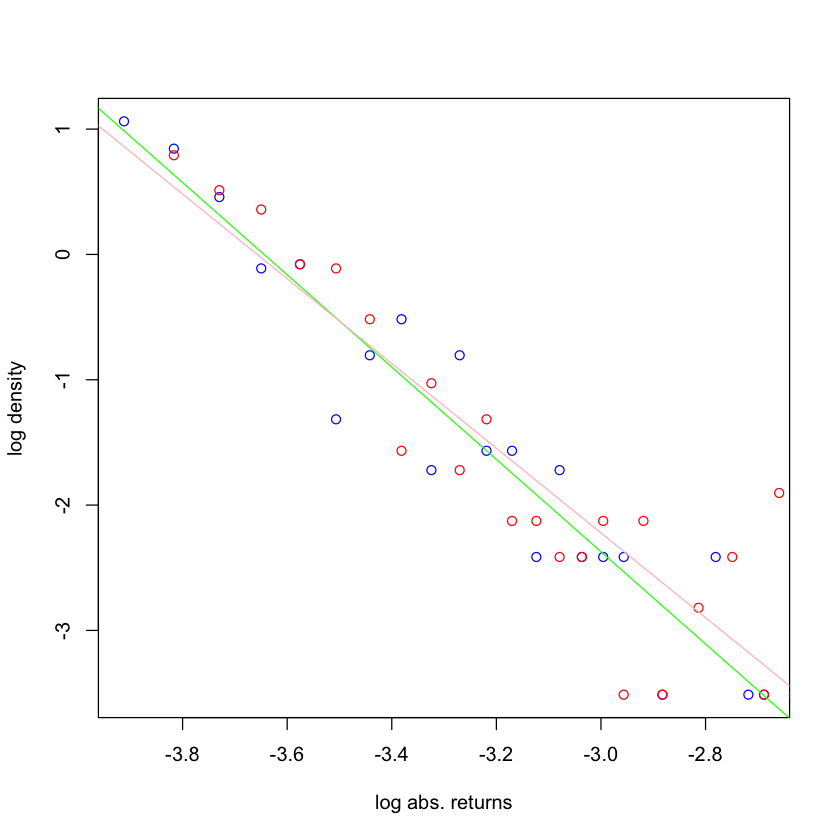

In [11]:
plot(lnx.rh,lny.rh,ylab="log density",col="blue",xlab="log abs. returns")
points(lnx.lh,lny.lh,col="red") 
abline(rh.lm,col="green") 
abline(lh.lm,col="pink") 

Figure 2: A log-log  plot of SPX returns. The red points are from the left tail, the blue points from the right tail, the green and pink lines are linear fits.  The fit slopes (rh:$3.66$, lh: $3.35$) are consistent with a value of $3$.

In [13]:
summary(rh.lm)


Call:
lm(formula = lny.rh ~ lnx.rh)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80873 -0.13171  0.00737  0.17897  0.76583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.4192     0.8284  -16.20 1.41e-12 ***
lnx.rh       -3.6824     0.2534  -14.53 9.60e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4073 on 19 degrees of freedom
Multiple R-squared:  0.9175,	Adjusted R-squared:  0.9131 
F-statistic: 211.2 on 1 and 19 DF,  p-value: 9.604e-12


In [14]:
summary(lh.lm)


Call:
lm(formula = lny.lh ~ lnx.lh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1432 -0.3442  0.1045  0.2794  1.4712 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.3648     0.9924  -12.46 1.92e-11 ***
lnx.lh       -3.3808     0.3149  -10.74 3.26e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5553 on 22 degrees of freedom
Multiple R-squared:  0.8397,	Adjusted R-squared:  0.8325 
F-statistic: 115.3 on 1 and 22 DF,  p-value: 3.259e-10


### The Student-t distribution

$$
p(x) =\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\,\pi}\,\Gamma\left(\frac{\nu}{2}\right)}\,\frac{1}{\left(1+\frac{x^2}{\nu}\right)^{\frac{\nu+1}{2}}}\sim \frac{1}{x^{\nu+1}}\text{ as }x\to \infty 
$$

So the tail-exponent $\zeta=\nu$, the degrees of freedom.

Obviously, this distribution has mean zero.  Its variance is

$$
\int x^2\,p(x)\,dx=\frac{\nu}{\nu-2}
$$

With $\nu=3$, the density simplifies to
$$
p(x) =\frac{2}{\sqrt{3}\,\pi}\,\frac{1}{\left(1+\frac{x^2}{3}\right)^2}
$$

### SPX daily log-returns: Student-t fit

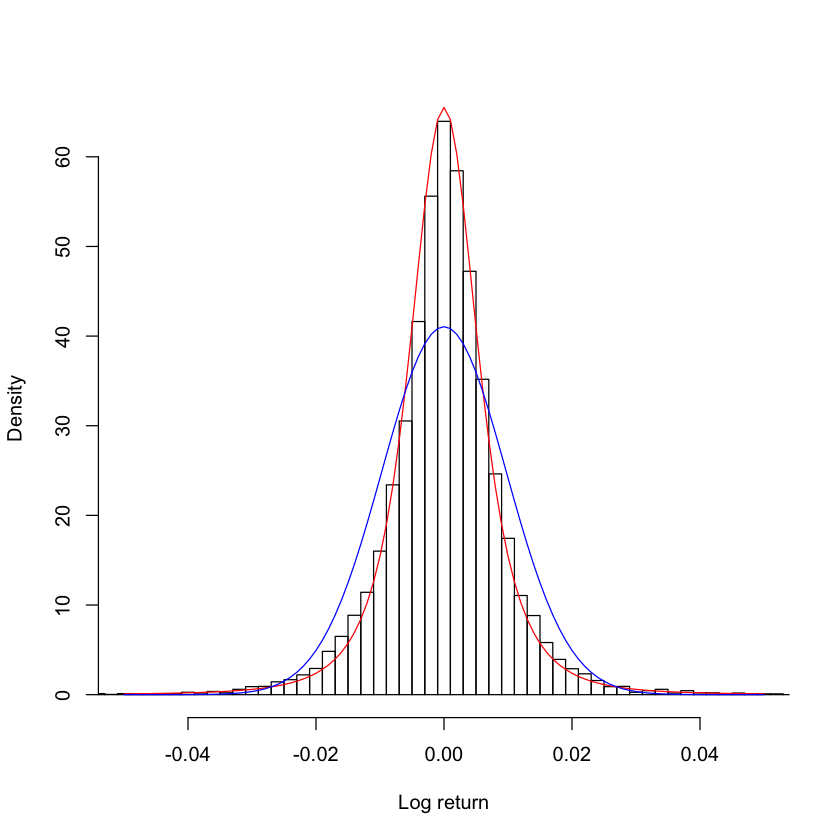

In [15]:
plot(hist.spx,xlim=c(-.05,.05),freq=F,main=NA,xlab="Log return") 
sig <- as.numeric(sd(ret.spx)) 
curve(dt(x*sqrt(3)/sig,df=3)*sqrt(3)/sig,from=-.05,to=.05,col="red", add=T)
curve(dnorm(x,mean=0,sd=sig),from=-.05,to=.05,col="blue", add=T)

Figure 3: Student-t with $\nu=3$ fits almost perfectly!  Normal fit is in blue.  The cubic law is confirmed.

### Note on power-law tails

Although Student-t seems to fit well, the distribution of log-returns cannot have power-law tails in reality.  For example, we certainly believe that the first moment of the stock price exists.  That is $\E[S_T]= \E[e^x]=C$ for some $C<\infty$ where $x = \log S_T/F$. If the distribution of log-returns is power-law with tail exponent $\nu$, then $\E[x^\alpha] = \infty$ if $\alpha>\nu$ and in particular $\E[e^x] >\infty$.

This is obviously true more generally in physics: one cannot have a true power-law in a system with finite physical extent.  Power-laws describe approximate behavior up to some cutoff.

### SPX weekly log-returns

[1] -0.0330647  0.0316570

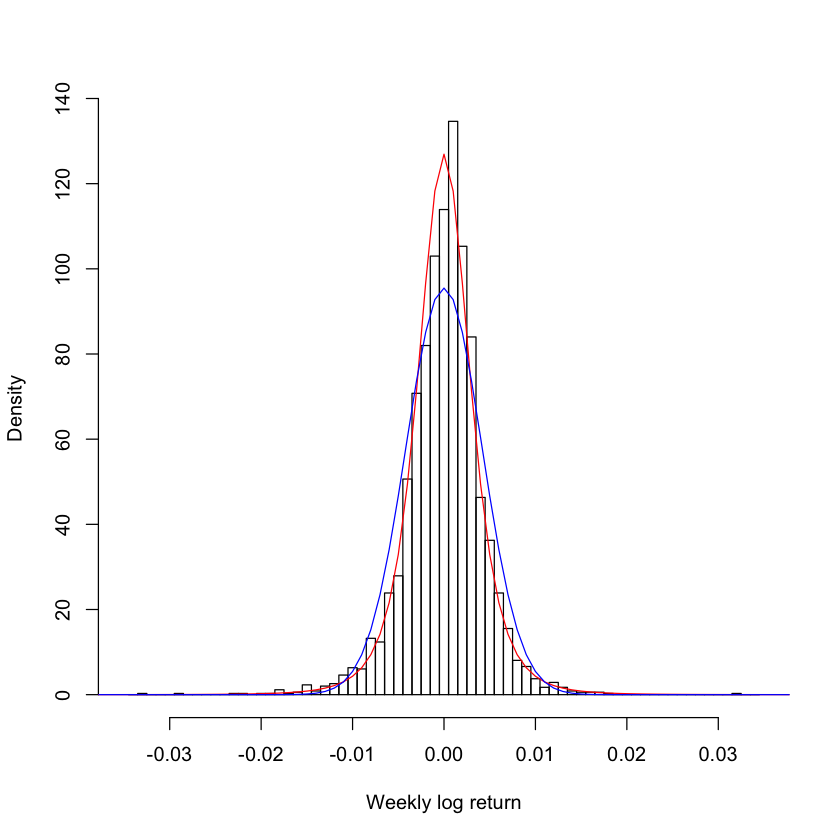

In [16]:
pxw <- Cl(to.weekly(GSPC))  # Built-in quantmod function to get close
retw <- Delt(log(pxw))[-1] 
retw <- retw-mean(retw) 
c(min(retw),max(retw))
breaks <- seq(-.0345,.0345,.001)
spx.histw <- hist(retw,breaks=breaks,plot=F) 
sigw <- as.numeric(sd(retw)) 
scale <- function(nu){sqrt(nu/(nu-2))} 

plot(spx.histw,xlim=c(-.035,.035),freq=F,main=NA,xlab="Weekly log return") 
curve(dt(x*scale(4)/sigw,df=4)*scale(4)/sigw,from=-.05,to=.05,col="red", add=T)
curve(dnorm(x,mean=0,sd=sigw),from=-.05,to=.05,col="blue", add=T) 

Figure 4: Student-t with $\nu=4$ in red. Normal fit is in blue.  Aggregational Gaussianity?

### SPX monthly log-returns

[1] -0.04378823  0.03509864

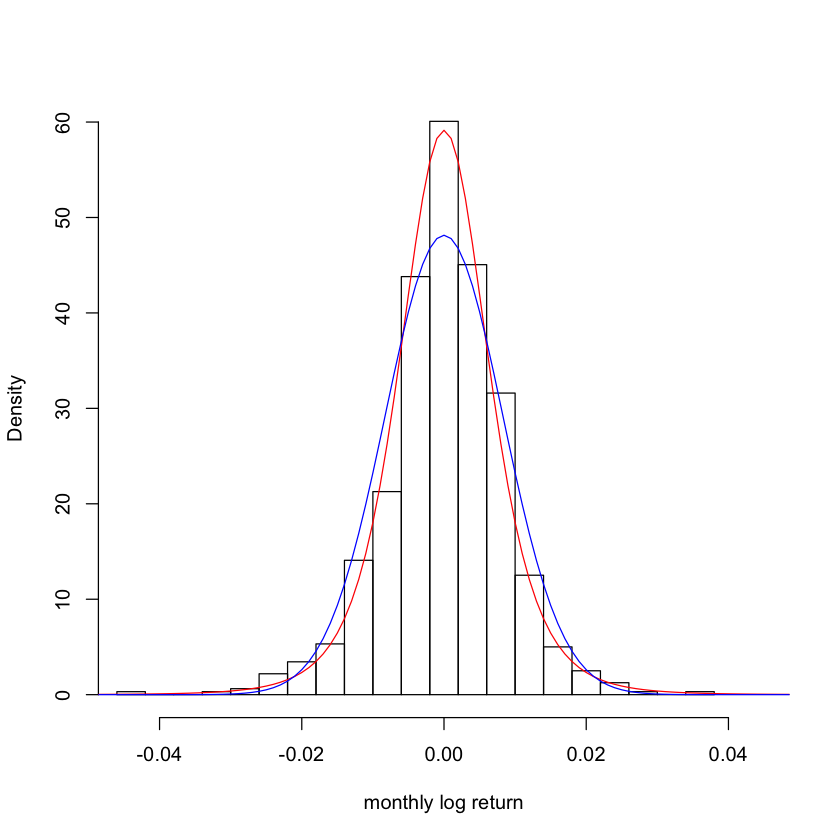

In [17]:
pxm <- Cl(to.monthly(GSPC))  # Built-in quantmod function to get close
retm <- Delt(log(pxm))[-1] 
retm <- retm-mean(retm) 
c(min(retm),max(retm))
breaks <- seq(-.046,.038,.004)
spx.histm <- hist(retm,breaks=breaks,plot=F) 
sigm <- as.numeric(sd(retm)) 
scale <- function(nu){sqrt(nu/(nu-2))} 

plot(spx.histm,xlim=c(-.045,.045),freq=F,main=NA,xlab="monthly log return") 
curve(dt(x*scale(5)/sigm,df=5)*scale(5)/sigm,from=-.05,to=.05,col="red", add=T)
curve(dnorm(x,mean=0,sd=sigm),from=-.05,to=.05,col="blue", add=T) 

Figure 5: Student-t with $\nu=5$ in red. Normal fit is in blue.  Aggregational Gaussianity again?

### Time series of SPX log-returns: Volatility clustering

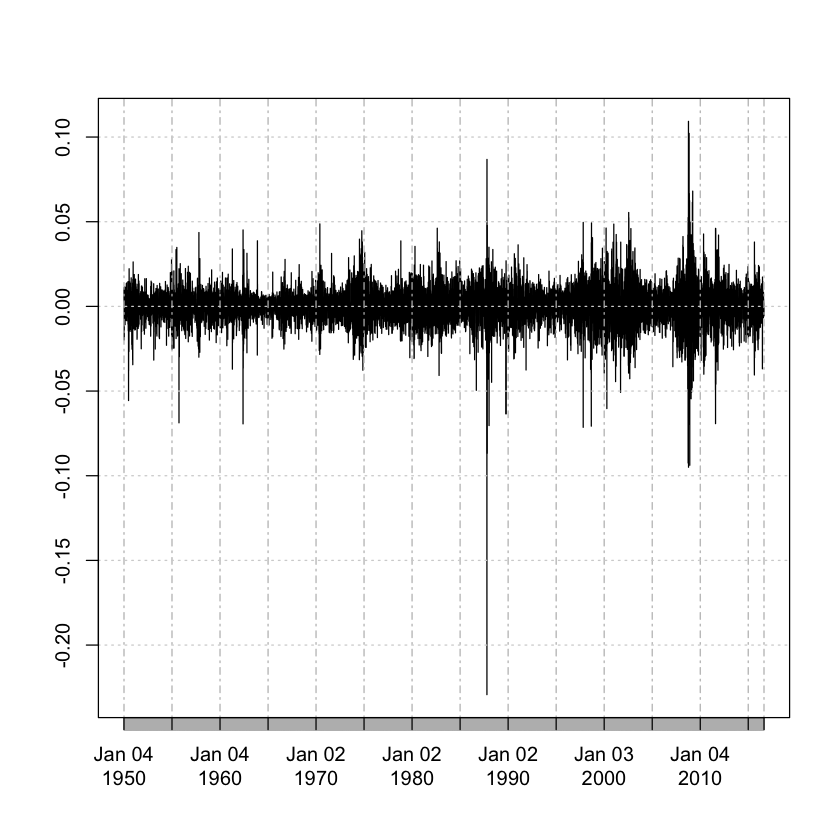

In [18]:
plot(ret.spx,main=NA)

Figure 6: Daily log-returns of SPX. Note the intermittency and volatility clustering!

### Autocorrelation of SPX returns

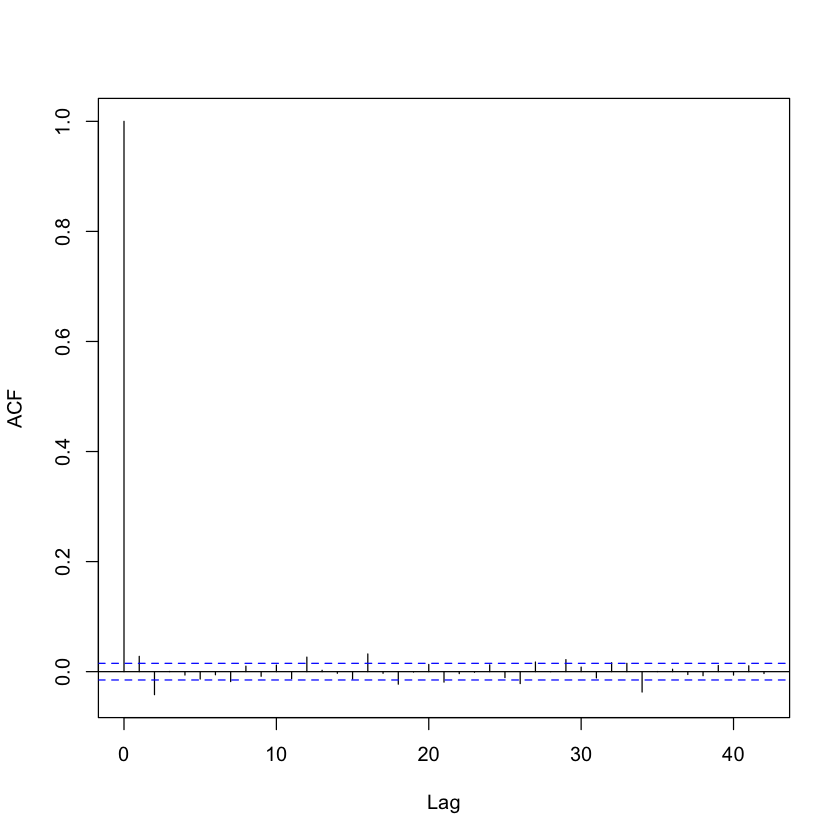

In [19]:
acf.r <- acf(ret.spx,main=NA)

Figure 7: No significant autocorrelation in returns.


### Autocorrelation of SPX absolute returns

It is a stylized fact that the autocorrelation function (ACF) of absolute log-returns decays as a power-law. However, we will see below that this widespread belief is probably not justified.


Call:
lm(formula = logacf.rabs[-(1:15)] ~ loglag.rabs[-(1:15)])

Coefficients:
         (Intercept)  loglag.rabs[-(1:15)]  
             -0.7391               -0.2991  



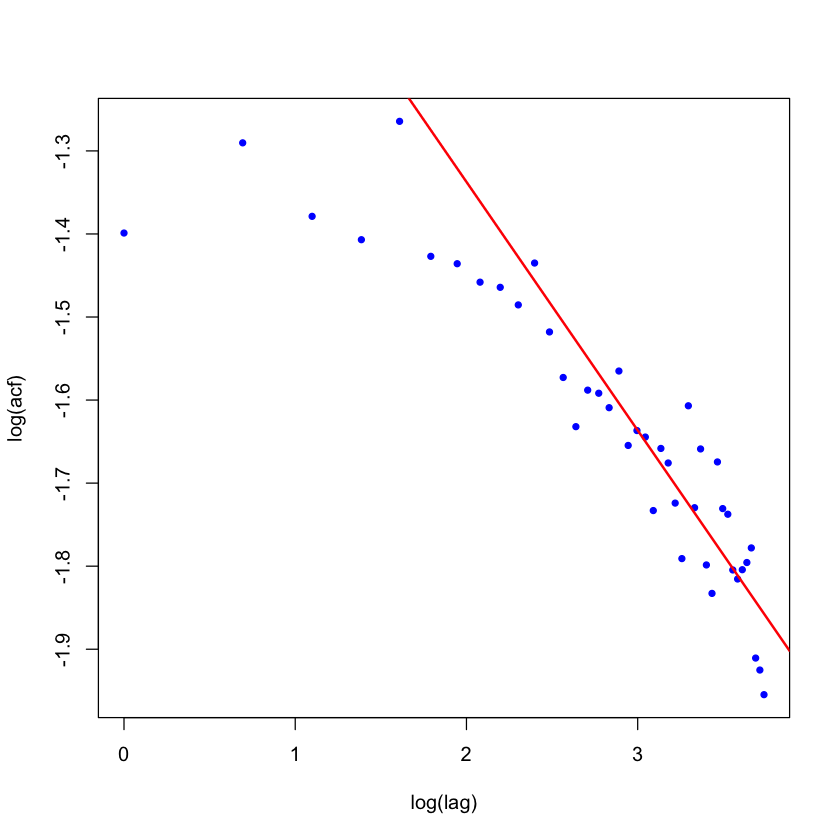

In [20]:
acf.rabs <- acf(abs(ret.spx),main=NA,plot=F)
logacf.rabs <- log(acf.rabs$acf)[-1]  
loglag.rabs <- log(acf.rabs$lag)[-1] 
plot(loglag.rabs,logacf.rabs,xlab="log(lag)",ylab="log(acf)",pch=20,col="blue") 
print(acfrabs.lm <- lm(logacf.rabs[-(1:15)]~loglag.rabs[-(1:15)]) )
abline(acfrabs.lm,col="red",lwd=2) 

Figure 8: Slope of fit is around $-0.29$.  

- It is often concluded from fits like this that the autocorrelation function of volatility decays roughly as $t^{-\alpha}$ with $\alpha \approx 0.3$.

### Autocorrelation of SPX squared returns


Call:
lm(formula = logacf.r2[-(1:15)] ~ loglag.r2[-(1:15)])

Coefficients:
       (Intercept)  loglag.r2[-(1:15)]  
           -1.0301             -0.5361  


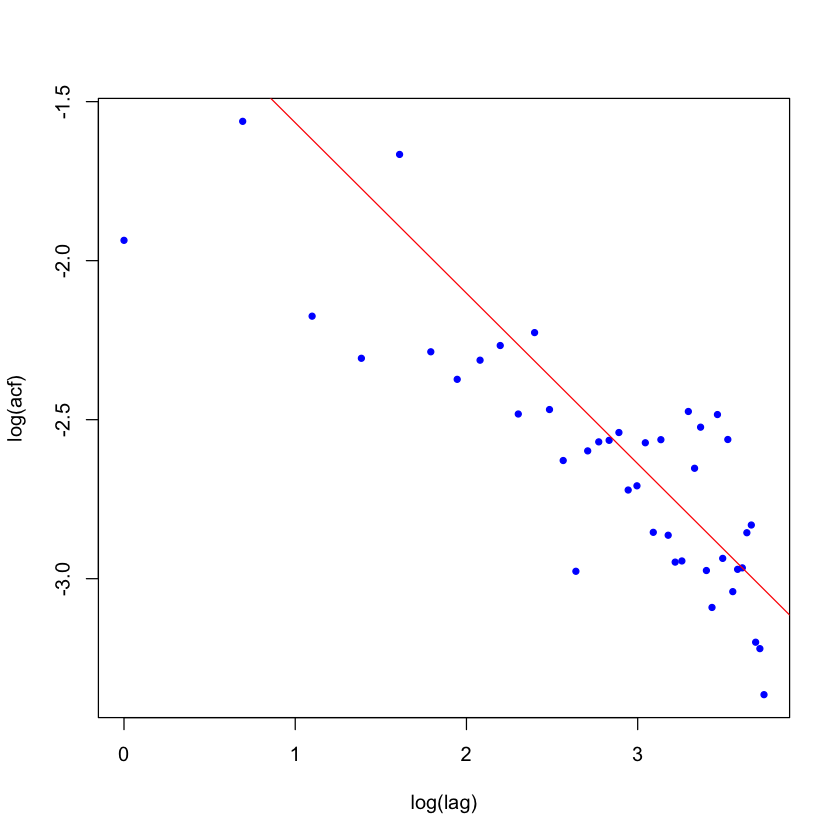

In [21]:
acf.r2 <- acf(ret.spx^2,main=NA,plot=F)
logacf.r2 <- log(acf.r2$acf)[-1]  
loglag.r2 <- log(acf.r2$lag)[-1] 
plot(loglag.r2,logacf.r2,xlab="log(lag)",ylab="log(acf)",pch=20,col="blue") 
(acfr2.lm <- lm(logacf.r2[-(1:15)]~loglag.r2[-(1:15)]) )
abline(acfr2.lm,col="red") 

Figure 9: Slope of fit is around $-0.53$ so autocorrelation seems to decay roughly as $1/\sqrt{t}$.

### The autocorrelation function of volatility

Absolute daily log-returns are (very) noisy proxies for daily volatilities $\sigma_t$ and squared daily log-returns are (very) noisy proxies for daily variances $\sigma_t^2$.  Gatheral and Oomen <sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>7<span>]</span></a></sup> (for example) show how tick data can be used to obtain more accurate estimates of daily realized variance $\sigma_r^2$.

The Oxford-Man Institute of Quantitative Finance makes historical realized variance estimates for 21 different stock indices freely available at http://realized.oxford-man.ox.ac.uk.  These estimates are updated daily. We may then investigate the time series properties of $\sigma_t^2$ empirically.


### Decay of the volatility ACF

As noted earlier, that the autocorrelation function of volatility decays as a power-law is more or less established as a stylized fact.  According to our recent work<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>6<span>]</span></a></sup> on rough volatility using such realized variance time series, the empirical ACF of volatility does not decay as a power-law. 

In fact, SPX realized variance has the following amazingly simple scaling property:

$$
m(q,\Delta) := \angl{|\log \sigma_{t+\Delta}-\log \sigma_t|^q}
=A\, \Delta^{q\,H} 
$$

where $\angl{\cdot}$ denotes a sample average.  

This simple scaling property holds for all 21 indices in the Oxford-Man dataset.  We have also checked that it holds for crude oil, gold and Bund futures.  For SPX over 14 years, $H \approx 0.14$ and $A \approx 0.38$.

As a consequence it may be shown that the autocorrelation function should take the form:

<a name="eq:ACF"></a>(2)
$$
\rho(\Delta)\sim e^{- \frac12\,\nu^2\,\Delta^{2\,H}}.
$$

### Predicted vs empirical autocorrelation function

We now superimpose the predicted functional form [(2)](#eq:ACF) of $\rho(\Delta)$ on the empirical data.

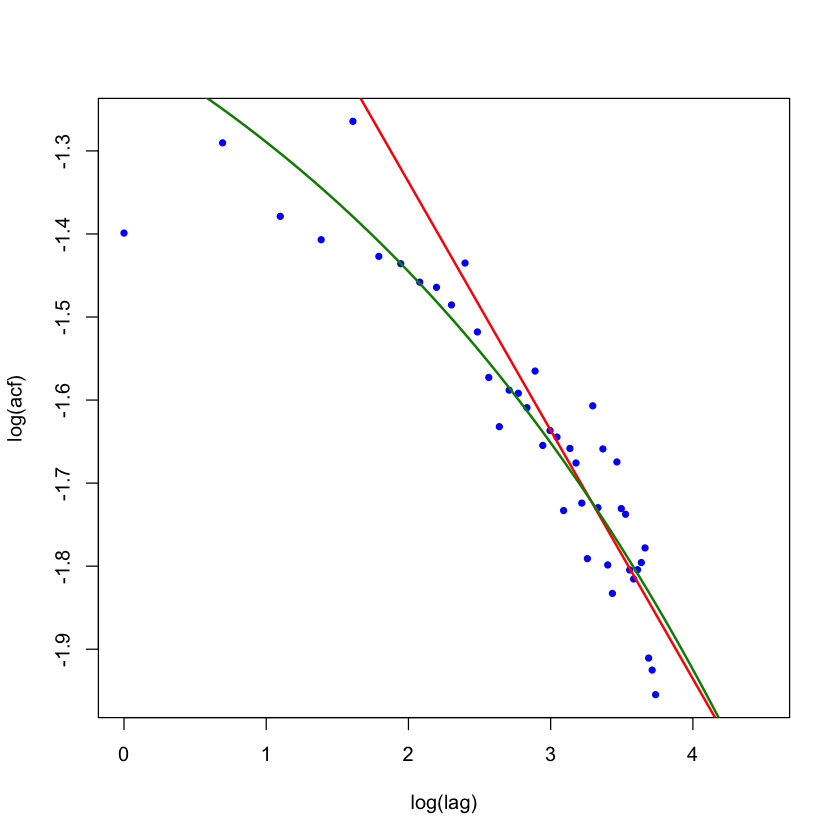

In [22]:
h.spx <- 0.14

y <- logacf.rabs
x <- acf.rabs$lag[-1]^(2*h.spx)

fit.lm <- lm(y[-1]~x[-1])
a <- fit.lm$coef[1]
b <- fit.lm$coef[2]

plot(loglag.rabs,logacf.rabs,xlab="log(lag)",ylab="log(acf)",pch=20,col="blue",xlim=c(0,4.5)) 
abline(acfrabs.lm,col="red",lwd=2) 
curve(a+b*exp(x*2*h.spx),from=0,to=4.5,add=T,col="green4",lwd=2)


Figure 10: The red line is the conventional linear fit; the green line is the rough volatilty prediction [(2)](#eq:ACF) .

### Log returns of VIX

VIX can be thought of as a measure of volatility smoothed over one month. Let's look at the distribution of VIX log-returns.

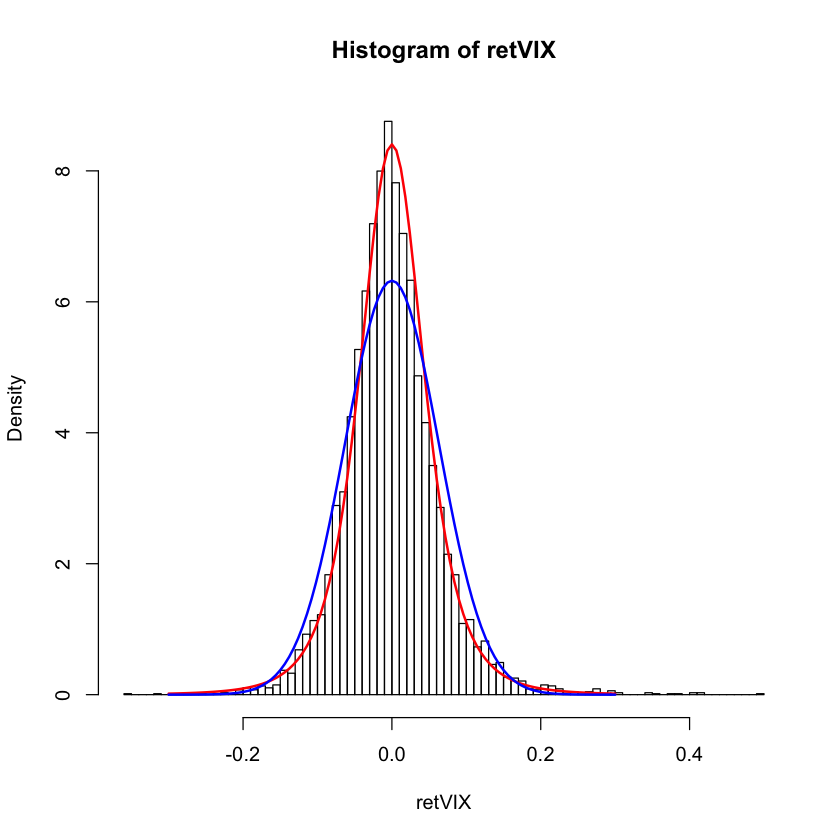

In [23]:
vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]

retVIX <- as.numeric(diff(log(vix))[-1])
retSPX <- as.numeric(diff(log(spx))[-1])

sdVIX <- as.numeric(sd(retVIX)) 

hist(retVIX,breaks = 100,freq=F)
scale <- function(nu){sqrt(nu/(nu-2))} 
curve(dt(x*scale(4)/sdVIX,df=4)*scale(4)/sdVIX,from=-.3,to=.3,col="red",lwd=2, add=T)
curve(dnorm(x,mean=0,sd=sdVIX),from=-.3,to=.3,col="blue", lwd=2,add=T) 

Figure 11: Log-returns of VIX are somewhat less fat-tailed than log-returns of SPX.

### VIX vs SPX

We now regress log-returns of VIX against log-returns of SPX.

[1] -0.7145276


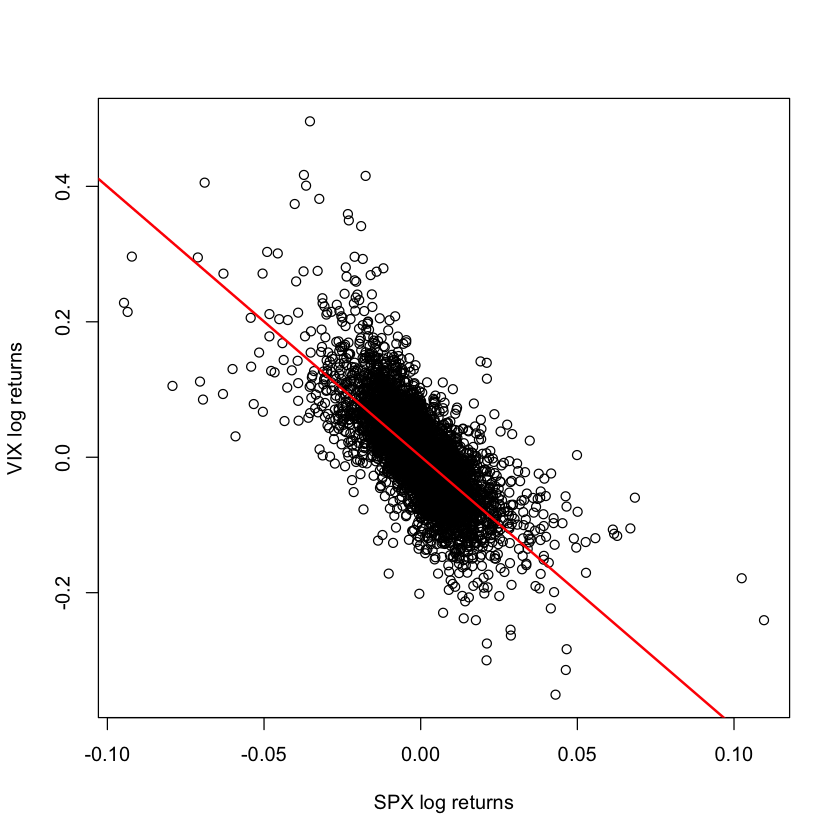

In [24]:
fit.spxvix <- lm(retVIX~retSPX)

# Scatter plot + fit
plot(retSPX,retVIX,xlab="SPX log returns",ylab="VIX log returns")
abline(fit.spxvix,col="red",lwd=2)

print(cor(retVIX,retSPX)) # Gets correlation

Figure 12: Regression of VIX log-returns vs SPX log-returns.

- Note the negative correlation $\approx -0.7$ - similar to the correlation implied from fits of stochastic volatility models to option prices.

### Power laws in high-frequency returns

For a good introduction to the analysis of empirical financial data, see Bouchaud and Potters<sup id="cite_ref-BouchaudPotters" class="reference"><a href="#cite_note-BouchaudPotters"><span>[</span>2<span>]</span></a></sup>.

* We analyze 17 days of CSCO trade data from 20-Aug-2007 to 12-Sep-2007
 * over 700,000 trades after cleaning.
* We compute price changes over intervals of a given number of trades. 


### Price changes after 1,000 trades

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/hist1000.png" align = "left" width=600></h3>  



Figure 13: A histogram of CSCO price changes after 1,000 trades. The red line is a fit of the normal density.


* We see from Figure 13 that the empirical distribution of high-frequency returns in trading time has a high peak and fat tails.  
 * Contrast this with the claim of An&eacute; and Geman that returns in trading time are normal.
* In Figure 14 below, we see that returns in trading time have fat tails.


### Log-log plot of CSCO prices changes

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/dt1000.png" align = "left" width=600></h3>  

Figure 14: The green line is a (power-law) fit to the blue points.  The orange curve is the fitted normal density.



### Autocorrelation of absolute price changes

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/cscoacfabs.png" align = "left" width=600></h3> 



Figure 15: Autocorrelation of absolute tick returns of CSCO on
07-Sep-2006.  The red line is the power-law fit
$C/\textrm{lag}^{0.61}$.

We see that the autocorrelation of absolute returns is well approximated by a power-law function of lag.

### Distribution of CSCO trade sizes

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/cscoSize.png" align = "left" width=600></h3> 



Figure 16: CSCO on 07-Sep-2006: Distribution of trade sizes

The distribution of trade sizes also has power-law tails with an exponent of roughly $5/2$.  This of course corresponds to a power-law tail in the CDF of approximately 3/2.

### Distribution of trade sizes for four French stocks

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/ChakrabortiFig14.png" align = "left" width=600></h3>

Figure 17: Data from 1-Oct-2007 to 30-May-2008: Distribution of market order sizes (from Chakraborti et al.<sup id="cite_ref-Chakraborti" class="reference"><a href="#cite_note-Chakraborti"><span>[</span>3<span>]</span></a></sup>)

###The Gabaix (2006) market impact explanation of the cubic law



The argument of Gabaix<sup id="cite_ref-Gabaix" class="reference"><a href="#cite_note-Gabaix"><span>[</span>5<span>]</span></a></sup> goes as follows:


Market impact is proportional to the square-root of trade size so
$$
\frac{\Delta S}{S} \sim \sqrt{V}$$

Then, the  dollar cost of a trade $\sim  V^{3/2}$.  It seems reasonable to suppose that the average dollar impact of a fund's trades should be proportional to the size $X$ of the fund.  So

$$
 V^{3/2} \sim X; \,V \sim X^{2/3}
$$

Fund sizes are assumed to be Zipf-distributed so $\zeta_X \approx 1$.  

Applying the rule from above
$$
\zeta_{X^\alpha}=\frac{\zeta_{X}}{\alpha},
$$
gives
$$
\zeta_V=\frac{\zeta_X}{2/3}=\frac{3}{2}
$$

The price return $r$ satisfies
$$
r=\frac{\Delta S}{S} \sim \sqrt{V} \sim X^{1/3}
$$
and applying the same rule again gives
$$
\zeta_r=\frac{\zeta_X}{{1}/{3}}=3
$$
both consistent with empirical estimates.

### Stochastic volatility

According to An&eacute; and Geman<sup id="cite_ref-AneGeman" class="reference"><a href="#cite_note-AneGeman"><span>[</span>1<span>]</span></a></sup>, returns are normal when measured in business time. 
One can verify empirically that observed returns have
approximately the same distribution no matter what timescale is
selected: clock time, volume time or transaction time. 


Gillemot, Farmer, and Lillo<sup id="cite_ref-Gillemot" class="reference"><a href="#cite_note-Gillemot"><span>[</span>8<span>]</span></a></sup> show that the conclusions of the above paper are incorrect, consistent with the pictures we just presented.

### Stochastic time change

More generally, if the variance in time $\tau$ were determined only by the number of trades $N_\tau$, and if we knew the distribution of $N_\tau$, we would be able to compute the distribution of returns.  




Denoting the distribution of returns by $p(x,v)$ and the distribution of $N$ by $q(N)$, we would have

$$
p_\tau(x)=\int\,p(x,v(N))\,q(N)\,dN.
$$

This is *subordination* of the process $x$ using the number of trades $N$ as the *directing process*.

### Empirical estimation of $Q(N)$

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/ChakrabortiFig13.png" align = "left" width=600></h3>  

Figure 18: Data from 1-Oct-2007 to 30-May-2008: Distribution of number of trades in BNPP.PA (from Chakraborti et al.<sup id="cite_ref-Chakraborti" class="reference"><a href="#cite_note-Chakraborti"><span>[</span>4<span>]</span></a></sup>).




### Volatility surface stylized properties

Having studied some properties of financial time series, let's now look at some stylized properties of volatility surfaces.

### Smiles as of 15-Sep-2005

We see that the graph of implied volatility vs log-strike looks like a skewed smile.  Some people say "smirk".

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/spxVols050915.png" align = "left" width=900></h3> 

Figure 19: SPX volatility smiles as of September 15, 2005.

### Interpreting the smile

Given a volatility smile for a particular time to expiration, there is very little that can be deduced about the underlying dynamics:

- The realized variance (quadratic variation) of the underlying from now to expiration is uncertain.

- As the underlying price decreases, volatility tends to increase (anticorrelation of underlying moves and volatility moves).

### 3D plot

Interpolating by time to expiration, we obtain the following picture of the SPX volatility surface as of the close on September 15, 2005.  $k:=\log{K/F}$ is the log-strike and $t$ is time to expiry in years.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/07/SA2009plot3D.png" align = "left" width=900></h3> 



### At-the-money (ATM) volatility skew

For a given time to expiration $T$, we define the ATM volatility skew

$$
\psi(T) = \left. \frac{\partial}{\partial k} \sigma_{\text{BS}}(k,T) \right|_{k=0}.
$$

It turns out that the observed term structure of $\psi$ in consistent with only a very restricted class of stochastic volatility models, and is in fact inconsistent with all conventional stochastic volatility models, including those with jumps.

### Observed term structure of ATM volatility skew

We study a period of history over which the ATM skew was relatively stable.

In [25]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/08/9875-1.zip", destfile="9875-1.zip")
unzip(zipfile="9875-1.zip")

In [26]:
load("spxAtmVolSkew2010.rData")

In [40]:
vsl <- volSkewList2010
n <- length(names(vsl))

mycol <- rainbow(n)

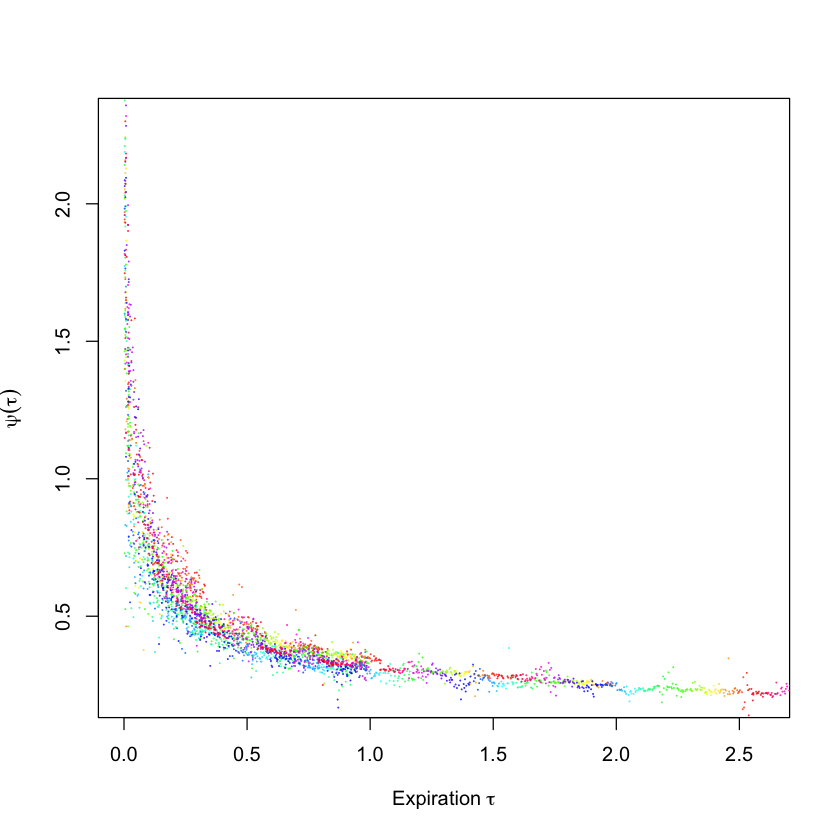

In [41]:
plot(vsl[[1]]$texp,abs(vsl[[1]]$atmSkew),col=mycol[1],pch=20,cex=0.1,xlim=c(0,2.6),
     xlab=expression(paste("Expiration ",tau)),ylab=expression(psi(tau)))
for (i in 2:n){
    points(vsl[[i]]$texp,abs(vsl[[i]]$atmSkew),col=mycol[i],pch=20,cex=0.1)
}

Figure 20: Decay of ATM skew (red dots) with respect to time to expiration.  Data is SPX from 01-Jun-2010 to 01-Jun-2011.

### A shorter even more stable period

In [43]:
vsl <- volSkewList2010[201:250]

n <- length(names(vsl))

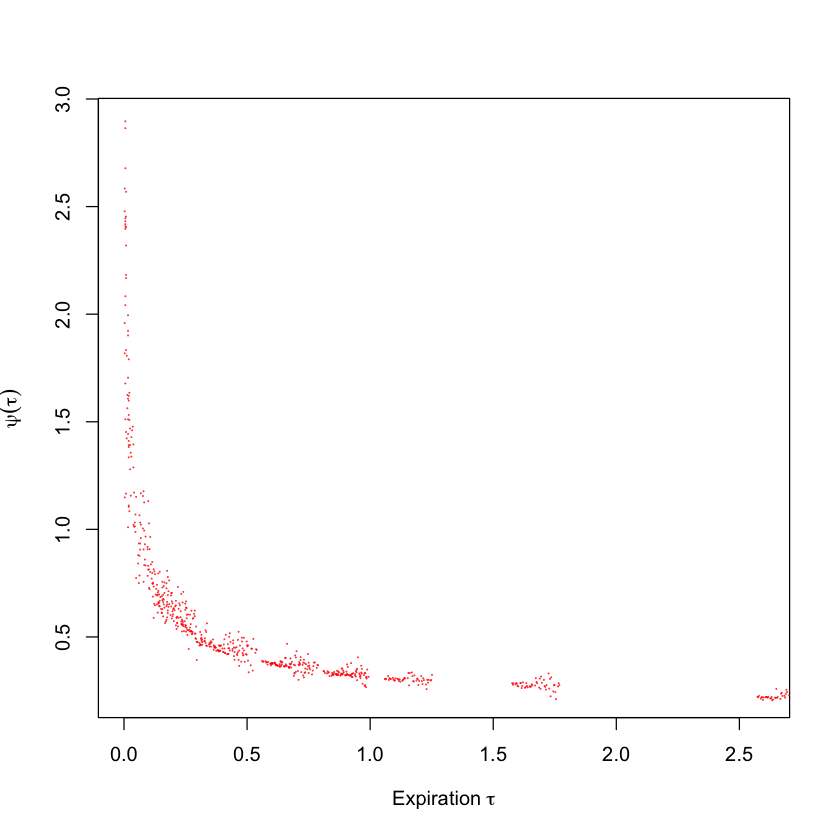

In [44]:
plot(vsl[[1]]$texp,abs(vsl[[1]]$atmSkew),col="red",pch=20,cex=0.1,xlim=c(0,2.6),
     xlab=expression(paste("Expiration ",tau)),ylab=expression(psi(tau)))
for (i in 2:n){
    points(vsl[[i]]$texp,abs(vsl[[i]]$atmSkew),col="red",pch=20,cex=0.1)
}

Figure 21: Decay of ATM skew (red dots) with respect to time to expiration.  Data is SPX from 16-Mar-2011 to 25-May-2011.

### Log-log plot of empirical ATM skew

In [45]:
lvsl.texp <- log(vsl[[1]]$texp)
lvsl.atmSkew <- log(abs(vsl[[1]]$atmSkew))

for (i in 2:n){
    lvsl.texp <- c(lvsl.texp,log(vsl[[i]]$texp))
    lvsl.atmSkew <- c(lvsl.atmSkew,log(abs(vsl[[i]]$atmSkew)))  
}


Call:
lm(formula = lvsl.atmSkew[pick] ~ lvsl.texp[pick])

Coefficients:
    (Intercept)  lvsl.texp[pick]  
        -1.1332          -0.3983  



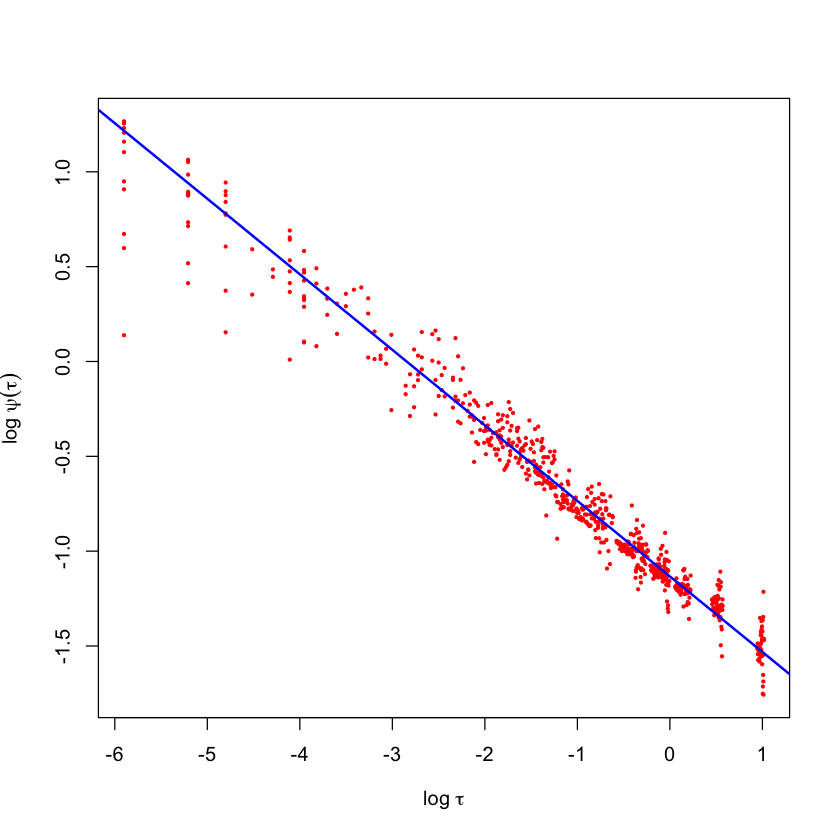

In [46]:
plot(lvsl.texp,lvsl.atmSkew,col="red",pch=20,cex=0.5,
     xlab=expression(paste("log ",tau)),ylab=expression(paste("log ", psi(tau))))

pick <- (lvsl.texp > -3)

print(fit.lm <- lm(lvsl.atmSkew[pick] ~ lvsl.texp[pick]))
abline(fit.lm,col="blue",lwd=2)

Figure 22: Log-log plot of decay of ATM skew (red dots) with respect to time to expiration. 

### Plot of ATM skew with power-law fit

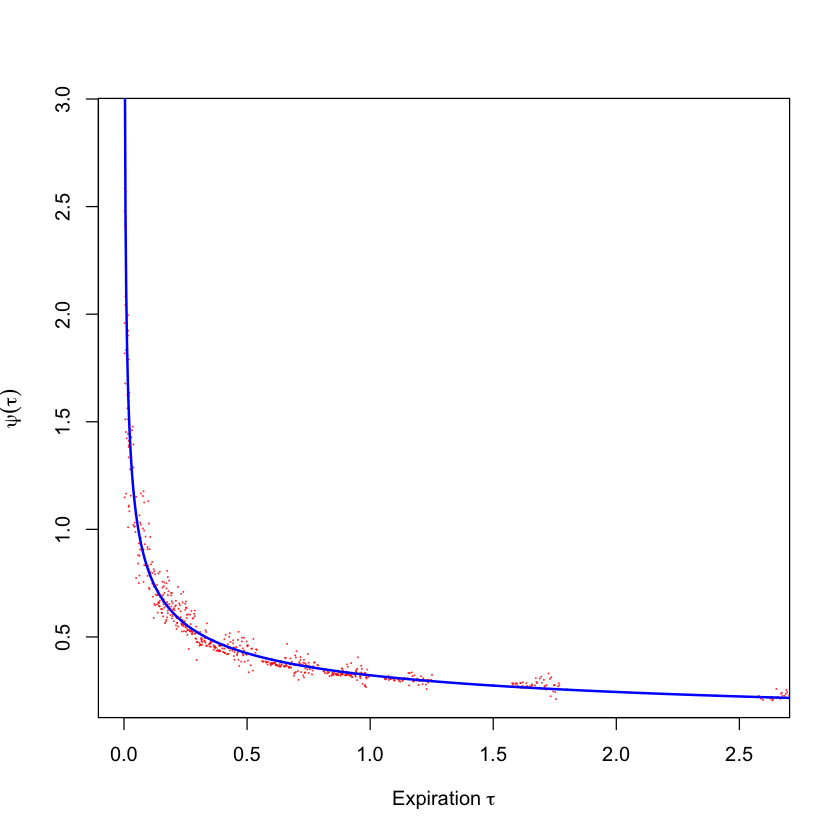

In [30]:
plot(vsl[[1]]$texp,abs(vsl[[1]]$atmSkew),col="red",pch=20,cex=0.1,xlim=c(0,2.6),
     xlab=expression(paste("Expiration ",tau)),ylab=expression(psi(tau)))
for (i in 2:n){
    points(vsl[[i]]$texp,abs(vsl[[i]]$atmSkew),col="red",pch=20,cex=0.1)
}

a <- fit.lm$coef[1]; b <- fit.lm$coef[2]
curve(exp(a+b*log(x)),from=0,to=3,col="blue",add=T,n=1000,lwd=2)

Figure 23: Log-log plot of decay of ATM skew (red dots) with respect to time to expiration.  Power-law fit $\psi(\tau) \sim \tau ^{-.3983}$ in blue.  Data is SPX from 16-Mar-2011 to 25-May-2011.

### Hedging European options

From the definition of implied volatility $\sigma_{\text{BS}}(k,T)$, the market price of an option is given by

$$
C(S,K,T) = C_{\text{BS}}(S,K,T,\sigma_{\text{BS}}(k,T))
$$

where $C_{\text{BS}}$ denotes the Black-Scholes formula and $k=\log K/S$ is the log-strike.

To hedge options using the Black-Scholes formula, market makers need to hedge two effects:

- The explicit spot effect 
$$\frac{\partial C}{\partial S}\,\delta S$$

and
- The change in implied volatility conditional on a change in the spot 

$$
\frac{\partial C}{\partial \sigma}\,\E \left[{\delta \sigma | \delta S}\right].
$$

ATM implied volatilities $\sigma(T)=\sigma_{\text{BS}}(0,T)$ and stock prices are both observable so market makers can estimate the second component using a simple regression:

$$
\delta \sigma(T) = \alpha + \beta(T)\,\frac{\delta S}{S} + \text{noise}.
$$

Then 

$$
\beta(T) = \E \left[ \delta \sigma(T) \bigg| \frac{\delta S}S \right].
$$.

### The skew-stickiness ratio

<span>[Bergomi]<sup id="cite_ref-Bergomi4" class="reference"><a href="#cite_note-Bergomi4"><span>[</span>2<span>]</span></a></sup> calls 
$$
\mathcal{R}(T) = \frac{\beta(T)}{\psi(T)} 
$$
the *skew-stickiness ratio* or *SSR*.


In the old days, traders would typically make one of two assumptions:

- **Sticky strike** $\mathcal{R}(T)=0$ where the implied volatility for a fixed strike is independent of stock price

or

- **Sticky delta** $\mathcal{R}(T)=1$ where the ATM volatility is independent of stock price.

Listed options were thought of as sticky strike and OTC options as sticky delta.

- **Empirically**, $\mathcal{R}(T) \approx 1.5$, *independent* of $T$.

### Regress volatility changes vs spot returns

Let's check the skew-stickiness ratio over the period June 1, 2010 to June 1, 2011, reproducing a figure from an article in the Encyclopedia of Quantitative Finance<sup id="cite_ref-Kamal" class="reference"><a href="#cite_note-Kamal"><span>[</span>9<span>]</span></a></sup>.

In [47]:
library(stinepack)

# First we need the time series of SPX returns:
spx2010 <- spx["2010-06-01::2011-06-01"]
ret.spx2010 <- diff(log(as.numeric(spx2010)))

n <- length(volSkewList2010)

vol.res <- array(dim=c(n,8))

for (i in 1:n){
    dat <- volSkewList2010[[i]]
    vol.res[i,1:4] <- stinterp(x=dat$texp,y=dat$atmVol,xout=c(1,3,6,12)/12)$y
    vol.res[i,5:8] <- stinterp(x=dat$texp,y=dat$atmSkew,xout=c(1,3,6,12)/12)$y    
}

vol.skew.atm <- as.data.frame(vol.res)
colnames(vol.skew.atm) <- c("vol.1m","vol.3m","vol.6m","vol.12m","skew.1m","skew.3m","skew.6m","skew.12m")

print(head(vol.skew.atm))

# Finally, create matrix of volatility changes
del.vol <- apply(vol.skew.atm[,1:4],2,function(x){diff(x)})

     vol.1m    vol.3m    vol.6m   vol.12m    skew.1m    skew.3m    skew.6m
1 0.3116781 0.2892093 0.2840357 0.2848998 -0.9775653 -0.6994318 -0.5033279
2 0.2585816 0.2569657 0.2637964 0.2674395 -1.0391103 -0.6308754 -0.5047893
3 0.2593993 0.2532371 0.2590840 0.2633074 -1.0543336 -0.6167919 -0.4882985
4 0.3217950 0.2916457 0.2932080 0.2841629 -0.9936603 -0.6787185 -0.5012572
5 0.3240469 0.2982968 0.2859462 0.2874102 -1.0006733 -0.6137535 -0.4395970
6 0.2963918 0.2821198 0.2833307 0.2822569 -1.1808506 -0.6769495 -0.5147833
    skew.12m
1 -0.3469127
2 -0.3334118
3 -0.3472150
4 -0.3454572
5 -0.3411661
6 -0.3498540


### 1-month SSR

In [48]:
y <- del.vol[,1]
x <- ret.spx2010*vol.skew.atm[-n,5]
fit.lm1 <- lm(y~x)
print(summary(fit.lm1))


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.039160 -0.004263  0.000181  0.004642  0.024866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.000265   0.000466   0.569     0.57    
x           1.474092   0.054832  26.884   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007394 on 251 degrees of freedom
Multiple R-squared:  0.7422,	Adjusted R-squared:  0.7412 
F-statistic: 722.7 on 1 and 251 DF,  p-value: < 2.2e-16



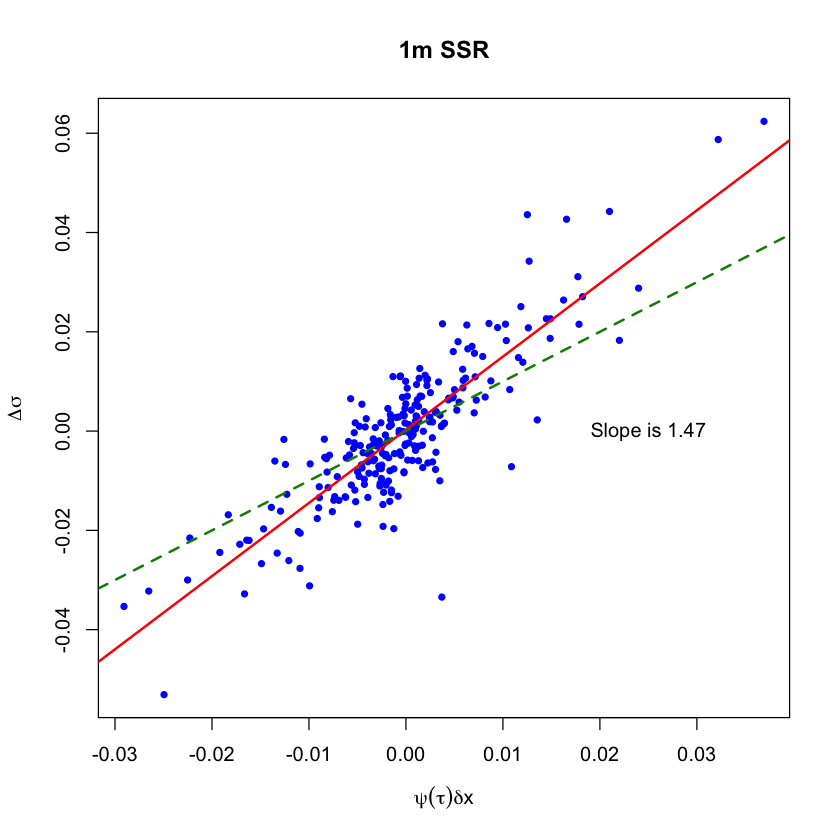

In [49]:
plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="1m SSR",pch=20,col="blue")
abline(fit.lm1,col="red",lwd=2)
text(x=0.025,y=-0.0,"Slope is 1.47")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 24: The 1-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### 3-month SSR

In [50]:
y <- del.vol[,2]
x <- ret.spx2010*vol.skew.atm[-n,6]
fit.lm3 <- lm(y~x)
print(summary(fit.lm3))


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0180521 -0.0023352 -0.0000552  0.0024244  0.0106338 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0001939  0.0002445   0.793    0.428    
x           1.4509582  0.0432965  33.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003876 on 251 degrees of freedom
Multiple R-squared:  0.8173,	Adjusted R-squared:  0.8166 
F-statistic:  1123 on 1 and 251 DF,  p-value: < 2.2e-16



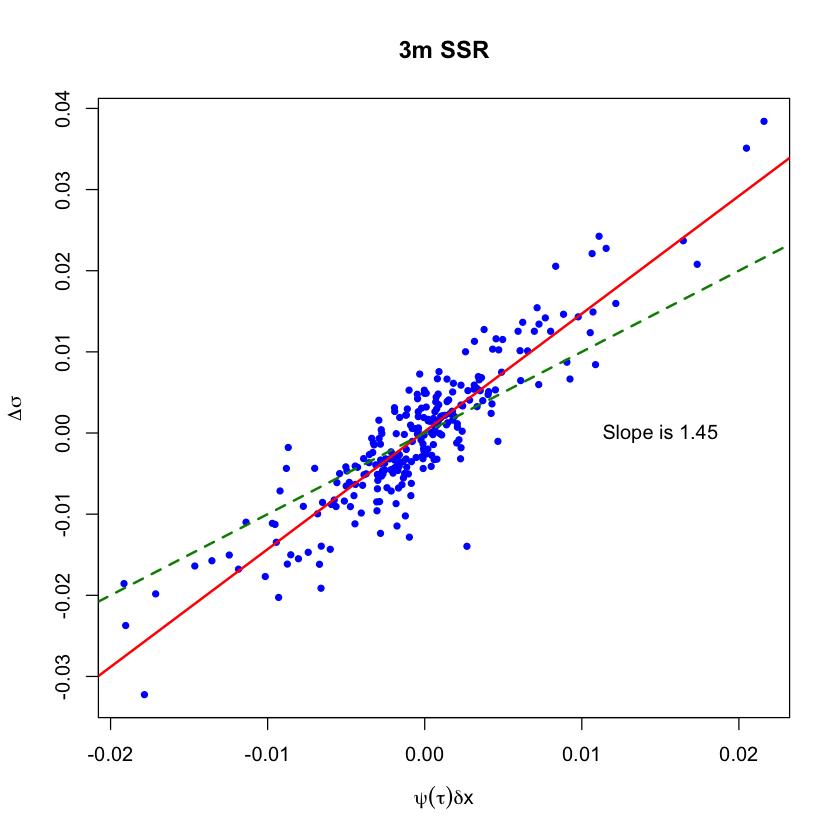

In [51]:
plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="3m SSR",pch=20,col="blue")
abline(fit.lm3,col="red",lwd=2)
text(x=0.015,y=-0.0,"Slope is 1.45")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 25: The 3-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### 6-month SSR

In [52]:
y <- del.vol[,3]
x <- ret.spx2010*vol.skew.atm[-n,7]
fit.lm6 <- lm(y~x)
print(summary(fit.lm6))


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0176677 -0.0017325 -0.0000075  0.0016376  0.0089884 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.003e-05  1.894e-04   0.423    0.673    
x           1.512e+00  4.522e-02  33.436   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003004 on 251 degrees of freedom
Multiple R-squared:  0.8166,	Adjusted R-squared:  0.8159 
F-statistic:  1118 on 1 and 251 DF,  p-value: < 2.2e-16



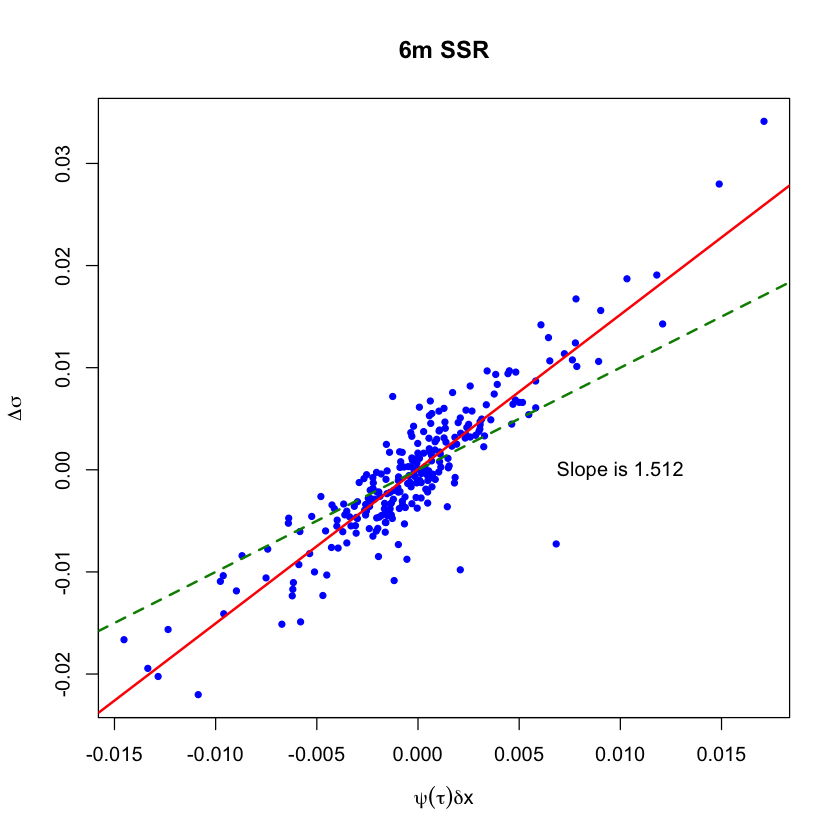

In [53]:
plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="6m SSR",pch=20,col="blue")
abline(fit.lm6,col="red",lwd=2)
text(x=0.01,y=-0.0,"Slope is 1.512")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 26: The 6-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### 12-month SSR

In [54]:
y <- del.vol[,4]
x <- ret.spx2010*vol.skew.atm[-n,8]
fit.lm12 <- lm(y~x)
print(summary(fit.lm12))


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.007310 -0.001219  0.000014  0.001259  0.008139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.517e-05  1.401e-04   0.465    0.642    
x           1.601e+00  4.407e-02  36.343   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002221 on 251 degrees of freedom
Multiple R-squared:  0.8403,	Adjusted R-squared:  0.8397 
F-statistic:  1321 on 1 and 251 DF,  p-value: < 2.2e-16



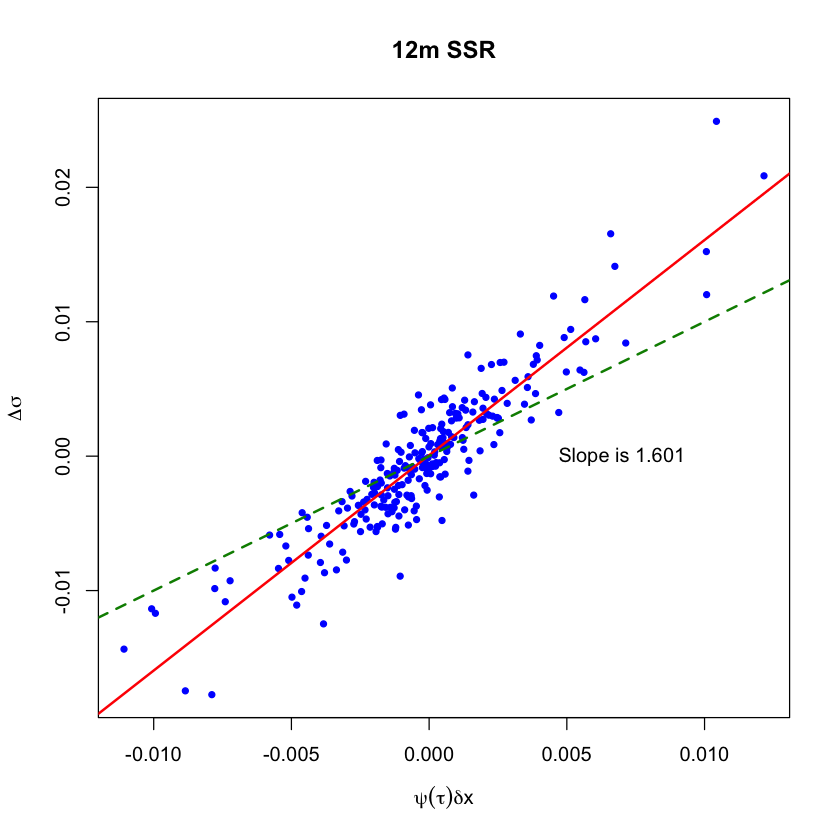

In [55]:
plot(x,y,xlab=expression(psi(tau)*delta*x),ylab=expression(Delta*sigma ),main="12m SSR",pch=20,col="blue")
abline(fit.lm12,col="red",lwd=2)
text(x=0.007,y=0.0,"Slope is 1.601")
abline(coef=c(0,1),lty=2,lwd=2,col="green4")

Figure 27: The 12-month skew-stickiness ratio (SSR).  The "sticky strike" green line with slope 1 clearly doesn't fit.

### The variance swap curve

Assuming the underlying diffuses, the fair value $\cV_t(T)$ of a variance swap with maturity $T$ may be computed as follows:

$$
\cV_t(T) = \int_t^T\,\xi_t(u)\,du = \int_0^\infty\,\min[P(K,T),C(K,T)]\,\frac{dK}{K^2}
$$

where $C(K,T)$ and $P(K,T)$ denote the prices of calls and puts with strike $K$ and expiration $T$ respectively.  For details, see for example <span>[The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>5<span>]</span></a></sup>.  We will visit this again in Lecture 12.


Thus, with this continuity assumption, we may compute the fair value of a variance swap from an infinite strip of call and put option prices (the so-called log-strip).  


- For a given maturity, the variance swap level depends on exactly how we interpolate and extrapolate option prices.


- We use the *arbitrage-free SVI parameterization* that I will explain in Session 3.


-  In particular, we will analyze variance swap estimates from June 01, 2010 to June 10, 2011, the same period as before.

In [36]:
load("spxVarSwapList2010.rData")

n <- length(names(varSwapList2010))

# Convert list to matrix
tmp <- array(dim=c(n,40))

for (i in 1:n){
    tmp[i,] <- varSwapList2010[[i]]$varSwap
}

varswap.mean <- apply(tmp,2,mean)
varswap.sd <- apply(tmp,2,sd)
tmat <- (1:40)*.05

### The average shape of the variance swap curve


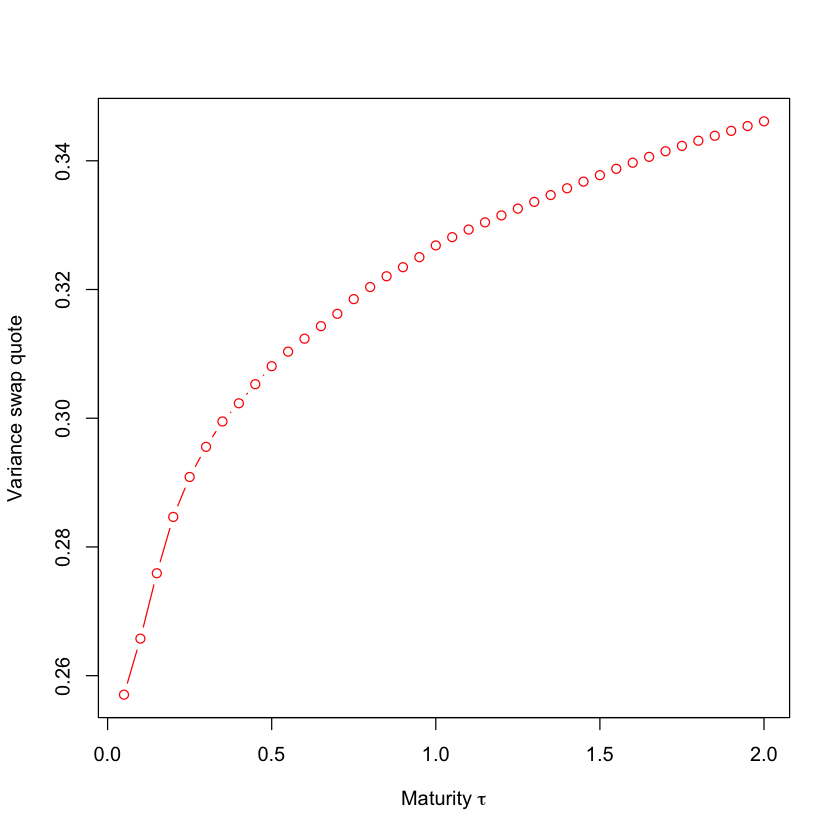

In [37]:
plot(tmat,sqrt(varswap.mean),type="b",col="red",xlab=expression(paste("Maturity ",tau)),ylab="Variance swap quote")

Figure 28: Average shape of the variance swap curve from  01-Jun-2010 to 01-Jun-2011.

### The volatility envelope

The *envelope* is the graph of volatilities of variance swap quotes vs time to maturity.  First, we draw a log-log plot of standard deviation of log-differences of the curves. 


Call:
lm(formula = y[1:20] ~ x[1:20])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046099 -0.015713  0.004174  0.014588  0.048747 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.885944   0.008890  -324.6   <2e-16 ***
x[1:20]     -0.365137   0.007513   -48.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02662 on 18 degrees of freedom
Multiple R-squared:  0.9924,	Adjusted R-squared:  0.992 
F-statistic:  2362 on 1 and 18 DF,  p-value: < 2.2e-16



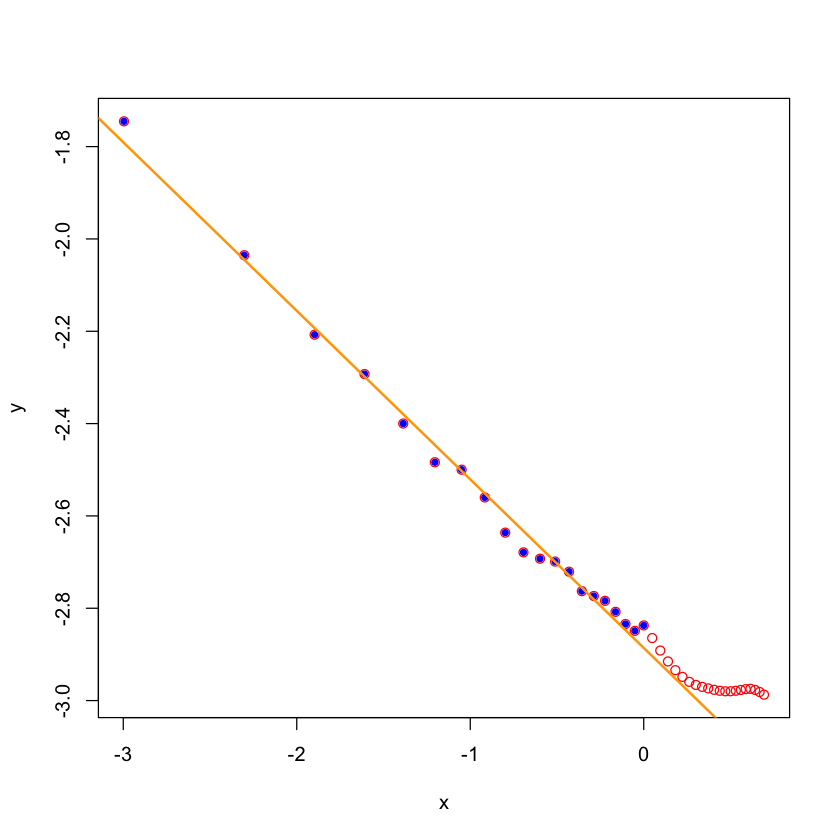

In [38]:
# Compute standard deviation of log-differences
sd.t <- function(x){sd(diff(log(x)))}

varswap.sd.t <- apply(tmp,2,sd.t)

# Log-log plot
x <- log(tmat)
y <- log(varswap.sd.t)
plot(x,y,col="red")
points(x[1:20],y[1:20],col="blue",pch=20)

fit.lm2 <- lm(y[1:20]~x[1:20])
print(summary(fit.lm2))
abline(fit.lm2,col="orange",lwd=2)
a2 <- fit.lm2$coef[1]; b2 <- fit.lm2$coef[2]

Figure 29: Log-log plot of volatility envelope with linear fit.

### Variance swap envelope with power-law fit

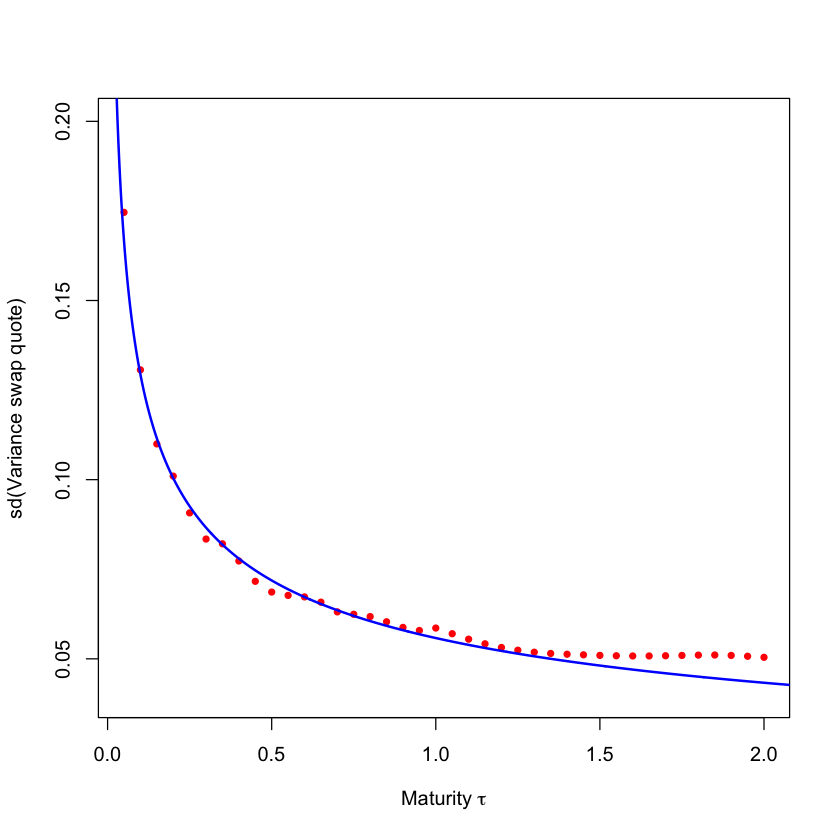

In [56]:
plot(tmat,varswap.sd.t,col="red",pch=20,xlab=expression(paste("Maturity ",tau)),ylab="sd(Variance swap quote)",ylim=c(0.04,.2))
curve(exp(a2+b2*log(x)),from=0,to=3,col="blue",add=T,n=1000,lwd=2)

Figure 30: Variance swap envelope from  01-Jun-2010 to 01-Jun-2011.  The blue line corresponds to the fit $\tau^{-0.365}$.

### Volatility surface summary

* The term structure of ATM volatility skew seems to be power-law $\sim T^{-0.4}$

* The term structure of the volatility envelope seems to be power-law $\sim T^{-0.4}$

* The Skew-stickiness ratio is empirically $1.5$ *independent* of time to expiry.


No conventional model of the volatility surface is consistent with these observations   
- with the exception of the Rough Volatility model!

### Moral of the story

As we will see, conventional stochastic volatility models are *normative*.

- We write down underlying dynamics as if to say ``suppose the underlying stochastic drivers were to satisfy the following...''.

- Dynamics are invariably Markovian, in contrast to the real world.

- The state space is typically very small.

<blockquote>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">


Conventional models of volatility are 
engineering models, not physics models.


</div>

</blockquote>

 - Conventional stochastic volatility models are Markovian approximations to a non-Markovian reality.



## References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

<li id="cite_note-AneGeman"><span class="mw-cite-backlink"><b><a href="#cite_ref-AneGeman">^</a></b></span>   Thierry An&eacute; and H&eacute;lyette Geman, Order flow, transaction
  clock, and normality of asset returns, *The Journal of Finance* **55**,
  2259-2284 (2000).</li>

<li id="cite_note-BouchaudPotters"><span class="mw-cite-backlink"><b><a href="#cite_ref-BouchaudPotters">^</a></b></span>   Jean-Philippe Bouchaud and Marc Potters, *Theory of Financial Risk and Derivative Pricing: From Statististical Physics to Risk Management, 2 edn.*, Cambridge University Press (2009).</li>
 
 
<li id="cite_note-Chakraborti"><span class="mw-cite-backlink"><b><a href="#cite_ref-Chakraborti">^</a></b></span> Anirban Chakraborti, Ioane Muni Toke, Marco Patriarca, and Fr&eacute;d&eacute;ric Abergel, Econophysics: I. Empirical facts, *Quantitative Finance*, **11**(7) 991-1012 (2011).</li>
 
<li id="cite_note-Cont2001"><span class="mw-cite-backlink"><b><a href="#cite_ref-Cont2001">^</a></b></span> Rama Cont Empirical properties of asset returns: stylized facts and statistical issues, *Quantitative Finance* **1** 223-236 (2001).</li>
 
<li id="cite_note-Gabaix"><span class="mw-cite-backlink"><b><a href="#cite_ref-Gabaix">^</a></b></span> Xavier Gabaix, Power laws in economics and finance, statistical issues, *Annual Review of Economics* **1** 255-293 (2009).</li>

<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b></span> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2509457  (2014).</li> 

<li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel Oomen, Zero-intelligence realized variance estimation, *Finance and Stochastics* **14**(2) 249-283 (2010).</li> 
 
<li id="cite_note-Gillemot"><span class="mw-cite-backlink"><b><a href="#cite_ref-Gillemot">^</a></b></span> L&aacute;szl&oacute; Gillemot, J. Doyne Farmer, and Fabrizio Lillo, There's more to volatility than volume, *Quantitative Finance* **6** 371-384 (2006).</li>
 
 <li id="cite_note-Kamal"><span class="mw-cite-backlink"><b><a href="#cite_ref-Kamal">^</a></b></span>Michael Kamal and Jim Gatheral, Implied Volatility Surface, *Encyclopedia of Quantitative Finance*, Wiley (2010). </li>
 

  
</ol>

